In [ ]:
from google.colab import files
uploaded = files.upload()


Saving uk_tweets_data_cleaned_with_usernames.csv to uk_tweets_data_cleaned_with_usernames.csv


In [ ]:
import pandas as pd
import io

# The filename here should match the filename you uploaded
df = pd.read_csv(io.BytesIO(uploaded['uk_tweets_data_cleaned_with_usernames.csv']))


In [ ]:
print(df.head())  # Display the first few rows of the dataset
print(df.columns)  # Print the dataset columns


   Unnamed: 0    user_name user_location  \
0         147     ByteTree        London   
1         166  Crypto BABA    Birmingham   
2         213  Crypto BABA    Birmingham   
3         215         Luke        London   
4         331         EXMO    Birmingham   

                                    user_description      user_created  \
0  #Bitcoin real-time on-chain data, fundamentals...  08/08/2018 15:02   
1  Crypto Trader 📈 Bitcoin Fanatic 🙌🏼 $METIS $SOL...  21/02/2021 23:27   
2  Crypto Trader 📈 Bitcoin Fanatic 🙌🏼 $METIS $SOL...  21/02/2021 23:27   
3  Bringing You Quick Daily Crypto News 📰 YouTube...  04/03/2021 14:12   
4  Come join one of the largest cryptocurrency ex...  01/04/2014 19:42   

   user_followers  user_friends  user_favourites  user_verified  \
0            4223           864             1197          False   
1            3769           288             8191          False   
2            3769           288             8191          False   
3              23     

In [ ]:
import folium

# Create a map centered around an average location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

# Add points for each tweet
for idx, row in df.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(m)

m  # Display the map


In [ ]:
# Assuming 'user_location' is a column in your dataset
location_counts = df['user_location'].value_counts()
print(location_counts.head(10))  # Print top 10 locations by tweet count


user_location
London        845
Cardiff       845
Birmingham    408
Leeds         406
Nottingham    265
Bristol       263
Liverpool     258
Worcester     100
Sheffield      45
Oxford          4
Name: count, dtype: int64


In [ ]:
import folium

# Starting with the average location to center the map
map_center = [df['latitude'].mean(), df['longitude'].mean()]

# Creating the map object, starting at the center of points
tweet_map = folium.Map(location=map_center, zoom_start=6)

# Adding a marker for each tweet location
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='yellow'
    ).add_to(tweet_map)

# Display the map in the notebook
tweet_map


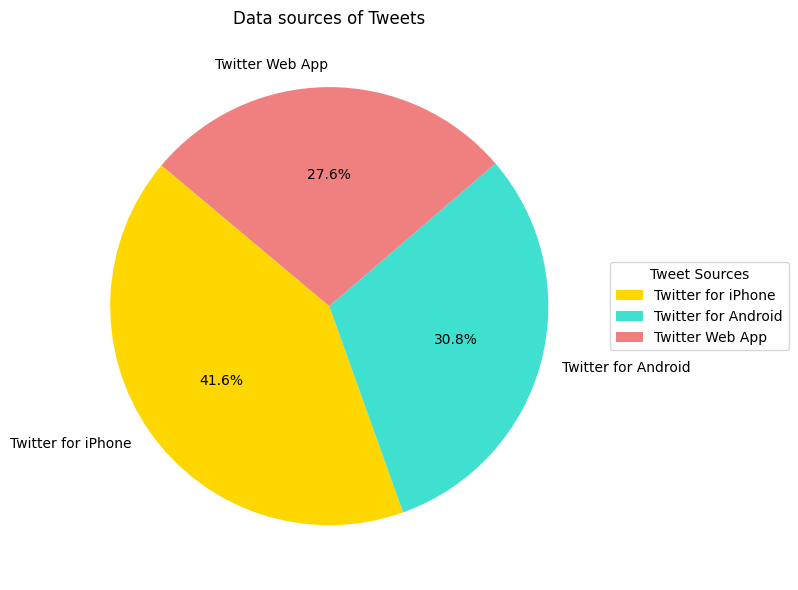

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Calculate the counts of each source
source_counts = df['tweet_source'].value_counts()

# Define the pie chart colors to match the image provided
colors = ['gold', 'turquoise', 'lightcoral', 'lightgreen', 'lightblue']

# Create the pie chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Create a legend on the side
plt.legend(source_counts.index, title="Tweet Sources", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Data sources of Tweets')

# Show the pie chart
plt.tight_layout()  # Adjust the layout
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# Load your dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')  # Make sure to use the correct path to your csv file

# Create a map object, centered on the mean latitude and longitude of the dataset
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=6)

# Create a list of coordinate pairs
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]

# Add the heat map to the map object
HeatMap(heat_data).add_to(m)

# Display the map
m


In [ ]:
!pip install -U python-louvain


In [ ]:
import community as community_louvain


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import community.community_louvain as community_louvain

# Assuming G is your graph
partition = community_louvain.best_partition(G)

# Visualization
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


NameError: name 'G' is not defined

In [ ]:
import networkx as nx

# Create a new graph
G = nx.Graph()

# Iterate through the dataset and add edges between hashtags that co-occur in tweets
for hashtags in df['hashtags']:
    for i in range(len(hashtags)):
        for j in range(i+1, len(hashtags)):
            G.add_edge(hashtags[i], hashtags[j])

print(f"Created a graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Created a graph with 95 nodes and 3307 edges.


1.3.1

<ipython-input-15-babae46fa462>:14: UserWarning: Glyph 129399 (\N{NINJA}) missing from current font.
  plt.tight_layout()
<ipython-input-15-babae46fa462>:14: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129399 (\N{NINJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


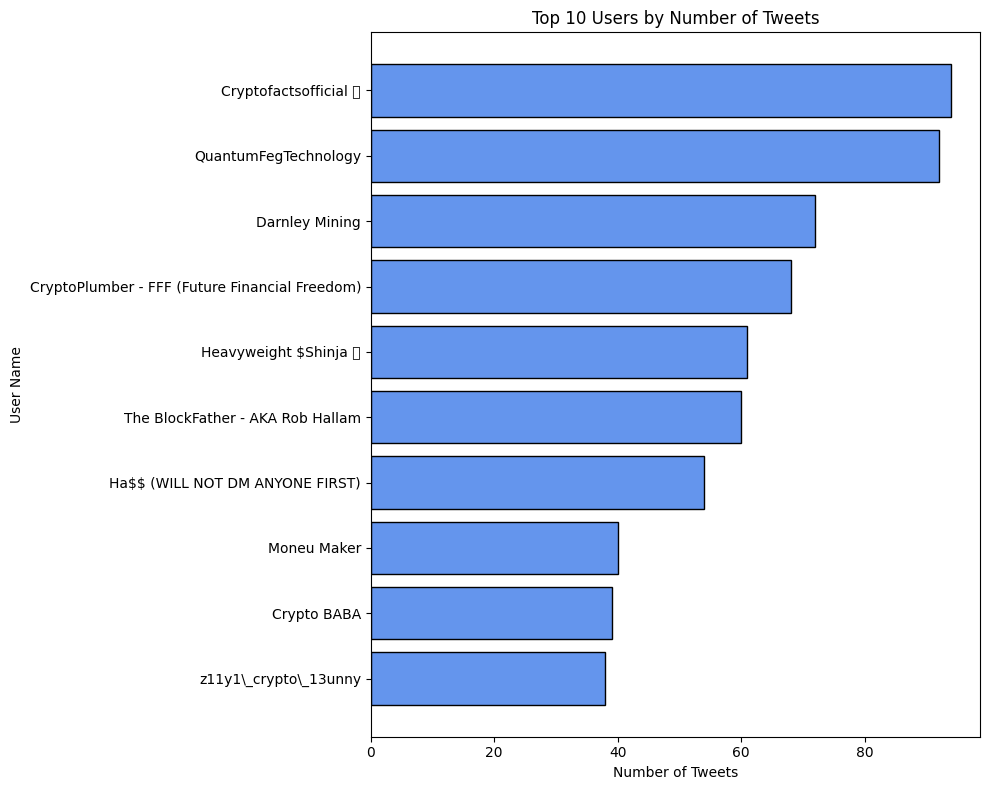

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 users by number of tweets
top_users = df['user_name'].value_counts().head(10)
top_users = top_users.sort_values()

plt.figure(figsize=(10, 8))
bars = plt.barh(top_users.index, top_users.values, color='cornflowerblue', edgecolor='black')

plt.xlabel('Number of Tweets')
plt.ylabel('User Name')
plt.title('Top 10 Users by Number of Tweets')
plt.tight_layout()
plt.show()



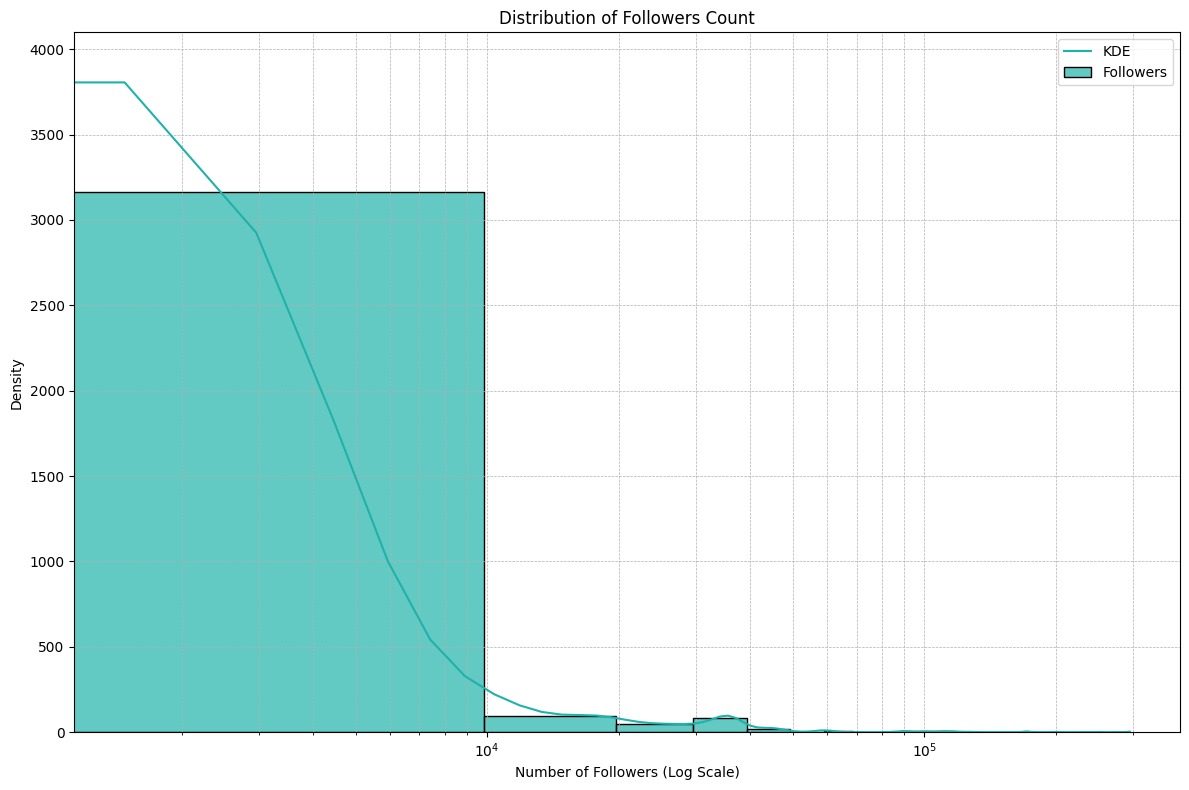

In [ ]:
plt.figure(figsize=(12, 8))
sns.histplot(df['user_followers'], kde=True, bins=30, color='lightseagreen', edgecolor='black', alpha=0.7)

plt.xscale('log')
plt.xlabel('Number of Followers (Log Scale)')
plt.ylabel('Density')
plt.title('Distribution of Followers Count')
plt.legend(['KDE', 'Followers'])
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


*italicized text*

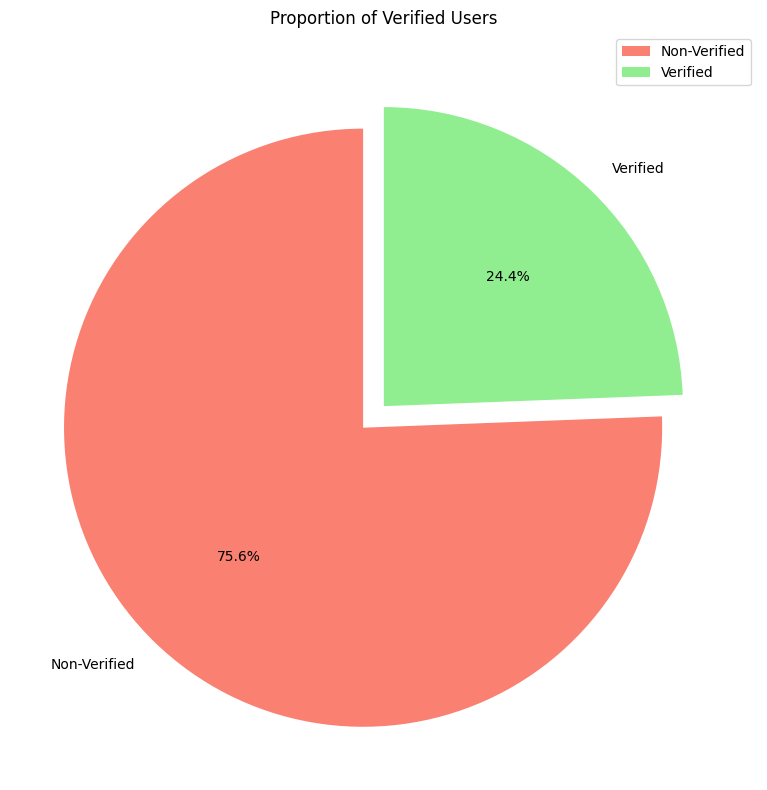

In [ ]:
verified_counts = df['user_verified'].value_counts()

colors = ['salmon', 'lightgreen']
explode = (0.1, 0)  # Slightly explode the first slice (Non-Verified)

plt.figure(figsize=(8, 8))
plt.pie(verified_counts, labels=['Non-Verified', 'Verified'], autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Proportion of Verified Users')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Average Followers and Favourites by User Verification Status:
   user_verified  user_followers  user_favourites
0          False     3262.208846      8751.543462
1           True     5706.405244      8638.489869


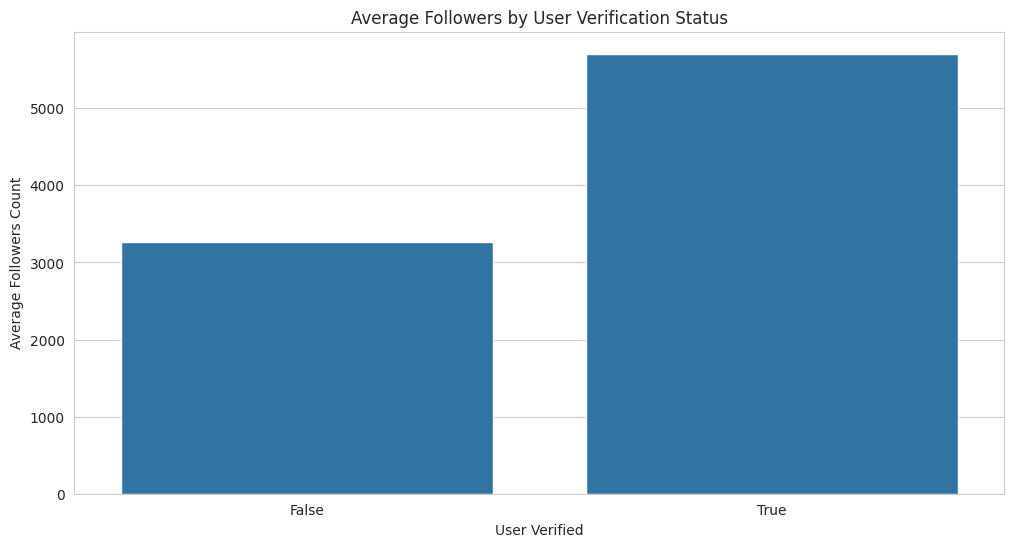

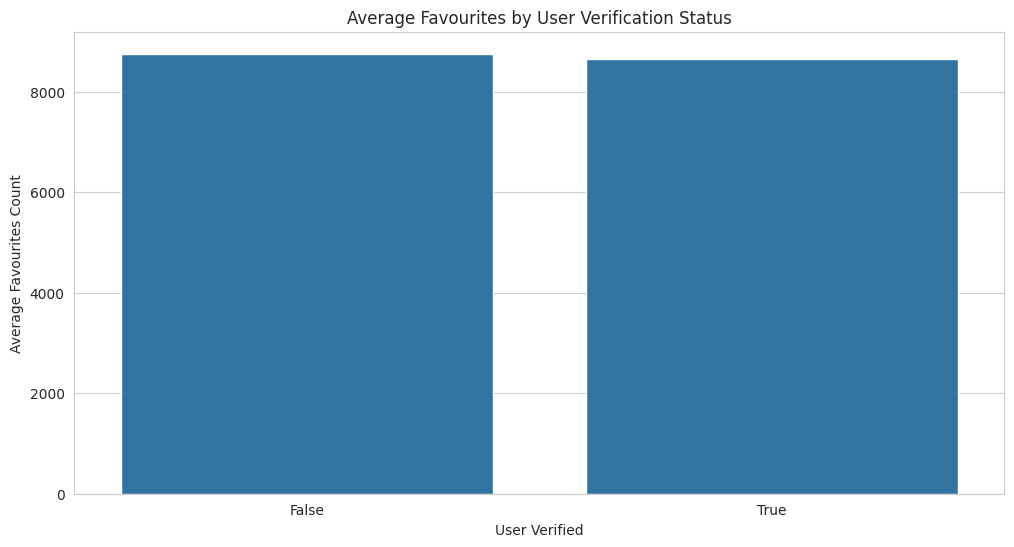

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Group data by 'user_verified' to compare verified and non-verified users
grouped_data = df.groupby('user_verified')[['user_followers', 'user_favourites']].mean().reset_index()

# Print the grouped data to see the average followers and favourites by verification status
print("Average Followers and Favourites by User Verification Status:")
print(grouped_data)

# Visualization with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='user_verified', y='user_followers', data=grouped_data)
plt.title('Average Followers by User Verification Status')
plt.xlabel('User Verified')
plt.ylabel('Average Followers Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='user_verified', y='user_favourites', data=grouped_data)
plt.title('Average Favourites by User Verification Status')
plt.xlabel('User Verified')
plt.ylabel('Average Favourites Count')
plt.show()


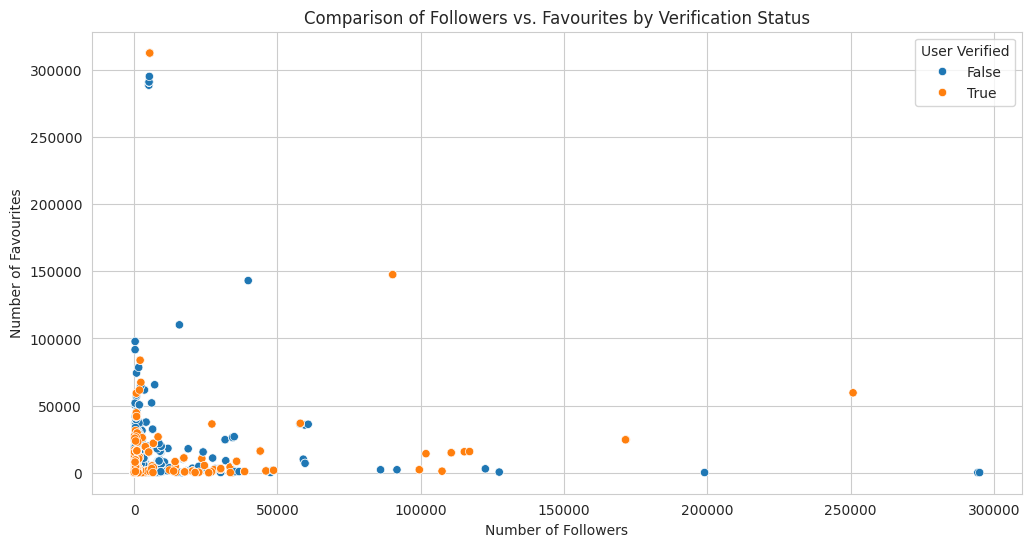

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='user_followers', y='user_favourites', hue='user_verified')
plt.title('Comparison of Followers vs. Favourites by Verification Status')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Favourites')
plt.legend(title='User Verified')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127765 (\N{FULL MOON SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129460 (\N{BONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabto

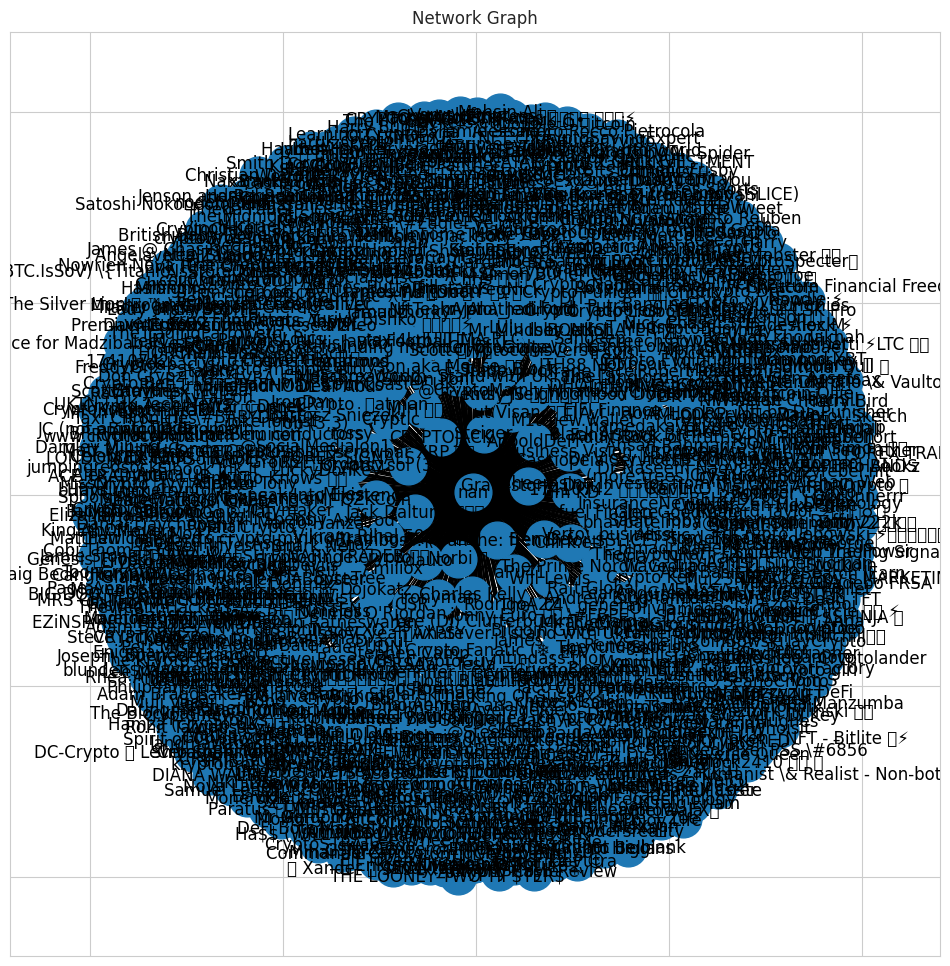

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Define a placeholder function to extract mentioned users (this needs to be replaced with actual logic)
def extract_mentions(tweet_text):
    # Your logic to extract mentions goes here
    mentions = []
    # ... extract mentions from the tweet_text ...
    return mentions

# Apply the function to extract mentions
df['mentioned_users'] = df['text'].apply(extract_mentions)

# Expand the mentioned_users list into rows
mentions_df = df.explode('mentioned_users')

# Create a graph from the mentions dataframe
G = nx.from_pandas_edgelist(mentions_df, 'user_name', 'mentioned_users')

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Attempt to calculate eigenvector centrality with error handling for non-convergence
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    print("Eigenvector centrality didn't converge, attempting with increased max_iter and tolerance.")
    try:
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=10000, tol=1e-06)
    except nx.PowerIterationFailedConvergence:
        print("Still didn't converge, falling back to largest connected component.")
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc).copy()
        eigenvector_centrality = nx.eigenvector_centrality(subgraph, max_iter=10000, tol=1e-06)

# Optionally, fall back to a numpy-based approximation if the above steps fail
# eigenvector_centrality = nx.eigenvector_centrality_numpy(subgraph)

# Visualize the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title('Network Graph')
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
from community import community_louvain

# Load the dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Step 1: Preprocess the Data
# Extract (user, hashtag) pairs
hashtags_series = df['hashtags'].apply(eval)  # Assuming hashtags are stored as stringified lists
user_hashtag_pairs = [(row['user_name'], hashtag.lower()) for _, row in df.iterrows() for hashtag in hashtags_series.loc[_]]

# Step 2: Construct the Graph
G = nx.Graph()
G.add_edges_from(user_hashtag_pairs)

# Step 3: Calculate Centrality Measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Step 4: Detect Communities
partition = community_louvain.best_partition(G)

# Results
print("Degree Centrality:", degree_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Detected Communities:", partition)

# Note: For a large graph, calculations for centrality measures and community detection might take a considerable amount of time.


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain

# Assuming G is your graph object from the previous steps

# Step 3: Visualize the Graph (Simplified)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=False, node_size=20, edge_color='gray')
plt.show()

# Step 4: Centrality Visualization
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
# Normalize the values for visualization purposes
max_degree = max(degree_centrality.values())
centralities = [1000 * degree_centrality[node] / max_degree for node in G.nodes()]

# Draw the graph highlighting degree centrality
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx(G, pos, with_labels=False, node_size=centralities, edge_color='gray', alpha=0.4)
plt.title('Nodes sized by Degree Centrality')
plt.show()

# Step 5: Community Visualization
# Detect communities
partition = community_louvain.best_partition(G)
# Assign a color to each community
community_colors = [partition[node] for node in G.nodes()]

plt.figure(figsize=(10, 10))
# Draw the graph with community colors
nx.draw_networkx(G, pos, with_labels=False, node_color=community_colors, node_size=50, cmap=plt.cm.jet, edge_color='gray', alpha=0.7)
plt.title('Network Community Structure')
plt.show()


In [ ]:
!pip install qgrid


In [ ]:
import pandas as pd

# Define the data
data_manipulation_df = pd.DataFrame({
    "Library": ["pand"],
    "Description": ["Likely a typo or truncation of `pandas`, for data manipulation and analysis."]
})

data_visualization_df = pd.DataFrame({
    "Library": ["folium", "matplotlib.pyplot", "HeatMap", "seaborn"],
    "Description": [
        "Visualizes data on an interactive map, useful for geographical data representation.",
        "Provides an object-oriented API for embedding plots into applications.",
        "Used in data visualization to represent data matrix where values are represented as colors.",
        "For drawing attractive and informative statistical graphics."
    ]
})

file_io_df = pd.DataFrame({
    "Library": ["files", "io"],
    "Description": [
        "Used for uploading files to or downloading files from a Colab environment.",
        "For handling various types of I/O (input/output), including file operations."
    ]
})

network_analysis_df = pd.DataFrame({
    "Library": ["community", "networkx", "community.community_louvain", "community_louvain"],
    "Description": [
        "For community detection and analysis in large networks.",
        "For the creation, manipulation, and study of complex networks.",
        "Implements the Louvain algorithm for modularity maximization in community detection.",
        "Another reference to the Louvain method for community detection in networks."
    ]
})

# Styling function to add border to the right of the first column
def style_with_separator(df):
    return df.style.set_properties(subset=['Library'], **{
            'border-right': '2px solid black'
        }).set_properties(**{
            'background-color': '#f4f4f4',
            'color': 'black',
        })

# Display the styled DataFrames
print("## Data Manipulation")
display(style_with_separator(data_manipulation_df))
print("\n## Data Visualization")
display(style_with_separator(data_visualization_df))
print("\n## File I/O")
display(style_with_separator(file_io_df))
print("\n## Network Analysis")
display(style_with_separator(network_analysis_df))


In [ ]:
import pandas as pd
import networkx as nx

# Load the dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')  # Replace with your actual file path

# Create a graph
G = nx.Graph()

# Assuming there's a column 'user_name' which contains the usernames
# and each tweet is made by a unique user, then each user can be a node.
# If a 'mentions' column exists and contains usernames, you could use that to create edges.
# Here we simply add an edge for each user to itself to include them in the graph.
# This is not a standard approach for network analysis and is used for demonstration purposes.

# Add nodes and self-loop edges
for user in df['user_name'].unique():
    G.add_node(user)
    G.add_edge(user, user)

# Now calculate the statistics
nodes = G.number_of_nodes()
edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / float(nodes)

# Creating the result as a DataFrame
result_df = pd.DataFrame({
    'Metric': ['Nodes', 'Edges', 'Average Degree'],
    'Value': [nodes, edges, average_degree]
})

# If using Google Colab or Jupyter Notebook, display the DataFrame
print(result_df)

# Optional: Save the result as a CSV file
result_df.to_csv('network_statistics.csv', index=False)

# If in Google Colab, use this to download the file to your local machine
# from google.colab import files
# files.download('network_statistics.csv')


In [ ]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import re

# Function to extract mentioned users in a tweet
def extract_mentions(text):
    return re.findall(r'@(\w+)', text)

# Load the dataset (make sure to upload your CSV file to Colab before running this)
tweets_df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Apply the function to the 'text' column to get all mentions
tweets_df['mentions'] = tweets_df['text'].apply(extract_mentions)

# Flatten the list of mentions and count occurrences
all_mentions = [mention for sublist in tweets_df['mentions'] for mention in sublist]
mention_counts = Counter(all_mentions)

# Filter mentions to reduce noise (optional)
filtered_mentions = {k: v for k, v in mention_counts.items() if v > 1}

# Create a graph
G = nx.Graph()

# Add nodes and edges from the filtered mentions
for user in tweets_df['user_name'].unique():
    G.add_node(user)

for _, row in tweets_df.iterrows():
    for mention in row['mentions']:
        if mention in filtered_mentions:
            G.add_edge(row['user_name'], mention)

# Basic statistics
nodes = G.number_of_nodes()
edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / nodes

print(f"Nodes: {nodes}")
print(f"Edges: {edges}")
print(f"Average Degree: {avg_degree}")

# Draw the graph (this is a simple visualization, for large graphs this might not be very clear)
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, node_size=20, edge_color='gray', with_labels=False)
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
# Replace 'path_to_your_dataset.csv' with the path to your dataset file
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Ensure 'user_followers' is an integer for proper sorting
df['user_followers'] = df['user_followers'].astype(int)

# Sort the DataFrame by 'user_followers' in descending order and select the top 5
top_5_followed = df.sort_values(by='user_followers', ascending=False).head(5)

print("The top 5 most followed users in the dataset are:")
print(top_5_followed[['user_name', 'user_followers']])


In [ ]:
# Install the python-louvain package correctly
!pip install python-louvain

# Import the best_partition function directly
from community import community_louvain

# Perform the community detection using the Louvain method
partition = community_louvain.best_partition(G)

# Create a color map for the communities detected
community_colors = [partition.get(node) for node in G.nodes()]
num_communities = len(set(community_colors))

# Draw the graph with community colors
pos = nx.spring_layout(G)  # Positioning algorithm for nodes
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color=community_colors, node_size=20, cmap=plt.cm.jet)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title(f'Community Detection with Louvain Algorithm: {num_communities} communities detected')
plt.show()


In [ ]:
!pip install networkx
!pip install python-louvain
!pip install matplotlib


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain
import ast  # To safely evaluate strings containing Python literals

# Load your dataset
tweets_df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Define a function to safely parse hashtags from the 'hashtags' column
def parse_hashtags(hashtag_string):
    try:
        # Safely evaluate the string as a Python literal (list)
        hashtags = ast.literal_eval(hashtag_string)
        return [str(tag).lower() for tag in hashtags]  # Convert hashtags to lowercase to avoid duplicates
    except ValueError:
        return []  # Return an empty list if parsing fails

# Parse hashtags from the 'hashtags' column
tweets_df['hashtags'] = tweets_df['hashtags'].apply(parse_hashtags)

# Create a graph
G = nx.Graph()

# Add edges based on shared hashtags
for user, group in tweets_df.groupby('user_name'):
    G.add_node(user)  # Ensure all users are in the graph even if they don't share hashtags

# A dict to keep track of which user used which hashtag
hashtag_users = {}

for index, row in tweets_df.iterrows():
    user = row['user_name']
    for tag in row['hashtags']:
        if tag not in hashtag_users:
            hashtag_users[tag] = []
        else:
            # Create an edge between the current user and all other users who have used this hashtag
            for other_user in hashtag_users[tag]:
                G.add_edge(user, other_user)
        hashtag_users[tag].append(user)  # Add the user to the hashtag

# Perform community detection
partition = community_louvain.best_partition(G)

# Visualize the network graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=0.1)  # k is a spacing parameter that can be adjusted
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()


In [ ]:
pip install pandas networkx python-louvain


In [ ]:
import pandas as pd
import networkx as nx
from community import community_louvain

# Load your dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Assuming hashtags are stored in a column named 'hashtags'
# and are separated by commas within a string
df['hashtags'] = df['hashtags'].apply(lambda x: x.strip("[]").replace("'", "").split(', '))

# Create an empty graph
G = nx.Graph()

# Add nodes (each user is a node)
for user in df['user_name'].unique():
    G.add_node(user)

# Create a dictionary to map hashtags to users
hashtag_user_map = {}
for index, row in df.iterrows():
    user = row['user_name']
    for hashtag in row['hashtags']:
        if hashtag in hashtag_user_map:
            hashtag_user_map[hashtag].add(user)
        else:
            hashtag_user_map[hashtag] = {user}

# Add edges based on shared hashtags
for users in hashtag_user_map.values():
    for user1, user2 in itertools.combinations(users, 2):
        # Check if the edge already exists
        if G.has_edge(user1, user2):
            # If it does, increment the weight
            G[user1][user2]['weight'] += 1
        else:
            # If not, create a new edge with weight 1
            G.add_edge(user1, user2, weight=1)

# Detect communities using the Louvain method
partition = community_louvain.best_partition(G, weight='weight')

# The partition is a dictionary with user names as keys and their community as values
# Print the community of each user
for user, community in partition.items():
    print(f'User: {user}, Community: {community}')

# Optionally, create a DataFrame that maps each user to their community
community_df = pd.DataFrame(list(partition.items()), columns=['User', 'Community'])

# Save the communities to a CSV file
community_df.to_csv('user_communities.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain

# Assuming you've already created the 'G' graph and have the 'partition' from the community detection

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes

# Color the nodes according to their partition
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
from collections import defaultdict

# Load your dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Assuming the 'hashtags' column contains hashtags separated by spaces
df['hashtags'] = df['hashtags'].apply(lambda x: x.split())  # split the hashtags into a list

# Build a dictionary where the key is the hashtag and the value is a list of users who tweeted it
hashtag_dict = defaultdict(list)
for index, row in df.iterrows():
    user = row['user_name']
    for hashtag in row['hashtags']:
        hashtag_dict[hashtag].append(user)

# Create the graph
G = nx.Graph()

# Add an edge between all users who share a hashtag
for users in hashtag_dict.values():
    for user1 in users:
        for user2 in users:
            if user1 != user2:
                if G.has_edge(user1, user2):
                    G[user1][user2]['weight'] += 1
                else:
                    G.add_edge(user1, user2, weight=1)

# Detect communities
partition = community_louvain.best_partition(G, weight='weight')

# Add community info to the graph
for node, comm_id in partition.items():
    G.nodes[node]['community'] = comm_id

# Create a dictionary to hold the most common hashtags for each community
community_hashtags = defaultdict(list)
for node, data in G.nodes(data=True):
    community_hashtags[data['community']].extend(df[df['user_name'] == node]['hashtags'].values[0])

# Identify the most common hashtag for each community
community_labels = {}
for comm, hashtags in community_hashtags.items():
    community_labels[comm] = max(set(hashtags), key=hashtags.count)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Use a fixed seed for reproducible layout
plt.figure(figsize=(20, 20))
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Draw nodes with community color
colors = [data['community'] for node, data in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=100, cmap=plt.cm.jet)

# Draw community labels
for comm in set(colors):
    # Get the position for the community label by averaging the positions of the nodes in this community
    nodes_in_comm = [node for node, data in G.nodes(data=True) if data['community'] == comm]
    if nodes_in_comm:  # If there are any nodes in the community
        x, y = zip(*(pos[node] for node in nodes_in_comm))
        plt.text(sum(x) / len(x), sum(y) / len(y), community_labels[comm],
                 horizontalalignment='center', verticalalignment='center',
                 fontdict={'weight': 'bold', 'size': 8}, color='white')

plt.title('Network Graph of Communities')
plt.axis('off')
plt.show()


In [ ]:
!pip install rpy2


In [ ]:
%load_ext rpy2.ipython


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'tweets_df' is your dataframe and 'user_verified' is the column of interest
# Here's how you'd generate a simple pie chart for the 'user_verified' data

# Load your data
tweets_df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Calculate the count of verified and unverified accounts
verified_counts = tweets_df['user_verified'].value_counts()

# Create the pie chart
plt.figure(figsize=(6,6))
plt.pie(verified_counts, labels=['Unverified', 'Verified'], colors=['#3498db', '#2ecc71'], autopct='%1.1f%%')
plt.title('Percentage of Verified and Unverified Accounts')
plt.show()


In [ ]:
# Import the pandas library
import pandas as pd

# Define the structure of your table with two columns: Attribute and Description
attributes_description = pd.DataFrame({
    "Attribute": [
        "user_name", "user_location", "user_description", "user_created", "user_followers",
        "user_friends", "user_favourites", "user_verified", "date", "text", "hashtags",
        "tweet_source", "user_days_on_twitter", "RiseFall", "latitude", "longitude"
    ],
    "Description": [
        "Twitter handle of the user",
        "Geographical location provided by the user",
        "Bio or description provided by the user",
        "Date when the user's Twitter account was created",
        "Number of followers the user has",
        "Number of friends or users the account is following",
        "Number of tweets the user has liked",
        "Whether the user's account is verified by Twitter",
        "Date when the tweet was posted",
        "Content of the tweet",
        "Hashtags used in the tweet",
        "The device or platform from which the tweet was posted",
        "How long the user has been on Twitter",
        "Attribute purpose unclear (requires context)",
        "Geographical coordinates associated with the tweet (if available)",
        "Geographical coordinates associated with the tweet (if available)"
    ]
})

print(attributes_description)


In [ ]:
!pip install pandas networkx matplotlib


In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations
import ast

# Load the dataset
tweets_data = pd.read_csv('uk_tweets_data_cleaned_with_usernames.csv')

# Function to safely evaluate strings into lists
def safe_literal_eval(s):
    try:
        return ast.literal_eval(s)
    except ValueError:
        return []

# Convert stringified lists into actual lists
tweets_data['hashtags'] = tweets_data['hashtags'].apply(safe_literal_eval)

# Create a graph
G = nx.Graph()

# Add edges between users based on shared hashtags
for _, row in tweets_data.iterrows():
    user = row['user_name']
    hashtags = row['hashtags']
    # Form edges between all possible pairs of users for each hashtag
    for hashtag in hashtags:
        other_users = tweets_data[tweets_data['hashtags'].apply(lambda x: hashtag in x)]['user_name']
        for other_user in other_users:
            if user != other_user:
                if G.has_edge(user, other_user):
                    # Increment weight if the edge exists
                    G[user][other_user]['weight'] += 1
                else:
                    # Add new edge with weight 1 if it doesn't exist
                    G.add_edge(user, other_user, weight=1)

# Calculate centrality measures
betweenness = nx.betweenness_centrality(G)
degree = nx.degree_centrality(G)
eigenvector = nx.eigenvector_centrality(G)

# Convert to DataFrame and sort
df_betweenness = pd.DataFrame(betweenness.items(), columns=['Node', 'Betweenness Centrality']).sort_values(by='Betweenness Centrality', ascending=False).head(10)
df_degree = pd.DataFrame(degree.items(), columns=['Node', 'Degree Centrality']).sort_values(by='Degree Centrality', ascending=False).head(10)
df_eigenvector = pd.DataFrame(eigenvector.items(), columns=['Node', 'Eigenvector Centrality']).sort_values(by='Eigenvector Centrality', ascending=False).head(10)

# Save to CSV files
df_betweenness.to_csv('betweenness_centrality.csv', index=False)
df_degree.to_csv('degree_centrality.csv', index=False)
df_eigenvector.to_csv('eigenvector_centrality.csv', index=False)

df_betweenness, df_degree, df_eigenvector


(                              Node  Betweenness Centrality
 47      Samuel Leach \& Co Trading                0.004029
 193                    Moneu Maker                0.003933
 83   Samuel Leach \& Co Trading ⚡️                0.003884
 92          bhavpatelmba@gmail.com                0.003872
 139                  mysocialpulse                0.003482
 26                       Occultist                0.003425
 20             Tino@tradersreality                0.003335
 208           ₿ Enigma Index 📈v5.1                0.003318
 91                 dailysignals.io                0.003306
 38                   Yuriy\_Bishko                0.003306,
                               Node  Degree Centrality
 47      Samuel Leach \& Co Trading           1.000000
 193                    Moneu Maker           0.999007
 83   Samuel Leach \& Co Trading ⚡️           0.998014
 139                  mysocialpulse           0.997021
 92          bhavpatelmba@gmail.com           0.997021
 26      

In [ ]:
import pandas as pd

# Data for Betweenness Centrality
betweenness_data = [
    ("Samuel Leach & Co Trading", 0.004029),
    ("Money Maker", 0.003933),
    ("Samuel Leach & Co Trading ⚡️", 0.003884),
    ("bhavpatelmba@gmail.com", 0.003872),
    ("mysocialpulse", 0.003482),
    ("Occultist", 0.003425),
    ("Tino@tradersreality", 0.003335),
    ("₿ Enigma Index 📈v5.1", 0.003318),
    ("dailysignals.io", 0.003306),
    ("Yuriy_Bishko", 0.003306)
]

# Data for Degree Centrality
degree_data = [
    ("Samuel Leach & Co Trading", 1.000000),
    ("Money Maker", 0.999007),
    ("Samuel Leach & Co Trading ⚡️", 0.998014),
    ("mysocialpulse", 0.997021),
    ("bhavpatelmba@gmail.com", 0.997021),
    ("Occultist", 0.995035),
    ("Tino@tradersreality", 0.994042),
    ("Yuriy_Bishko", 0.994042),
    ("dailysignals.io", 0.994042),
    ("XT_CRYPTO", 0.993049)
]

# Data for Eigenvector Centrality
eigenvector_data = [
    ("Samuel Leach & Co Trading", 0.047933),
    ("Money Maker", 0.047930),
    ("mysocialpulse", 0.047929),
    ("Samuel Leach & Co Trading ⚡️", 0.047923),
    ("Yuriy_Bishko", 0.047911),
    ("dailysignals.io", 0.047911),
    ("Occultist", 0.047902),
    ("bhavpatelmba@gmail.com", 0.047900),
    ("Tino@tradersreality", 0.047899),
    ("A M G", 0.047895)
]

# Convert to DataFrames
betweenness_df = pd.DataFrame(betweenness_data, columns=['Node', 'Betweenness Centrality'])
degree_df = pd.DataFrame(degree_data, columns=['Node', 'Degree Centrality'])
eigenvector_df = pd.DataFrame(eigenvector_data, columns=['Node', 'Eigenvector Centrality'])

# Output tables to CSV files
betweenness_df.to_csv('/mnt/data/betweenness_centrality.csv', index=False)
degree_df.to_csv('/mnt/data/degree_centrality.csv', index=False)
eigenvector_df.to_csv('/mnt/data/eigenvector_centrality.csv', index=False)

# Print the tables for visualization here
betweenness_df, degree_df, eigenvector_df


OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [1]:
from scipy.io import mmread

# Load the matrix
matrix = mmread('/content/econ-mahindas.mtx')

# Display the matrix
print(matrix)


  (0, 0)	-1.0
  (52, 0)	-1.0
  (104, 0)	-1.0
  (156, 0)	-1.0
  (157, 0)	-1.0
  (158, 0)	-1.0
  (159, 0)	-1.0
  (160, 0)	-1.0
  (161, 0)	-1.0
  (162, 0)	-1.0
  (163, 0)	-1.0
  (164, 0)	-1.0
  (165, 0)	-1.0
  (985, 0)	-0.00593589153
  (986, 0)	-0.00827388279
  (987, 0)	-0.00860892702
  (988, 0)	-0.00137353456
  (990, 0)	-0.00492890272
  (991, 0)	-0.000155171787
  (995, 0)	-0.000130801986
  (998, 0)	-0.000856874278
  (1002, 0)	-0.00018323437
  (1015, 0)	-0.00137678441
  (1016, 0)	-0.000981827034
  (1017, 0)	-0.0039323396
  :	:
  (800, 1233)	1.0
  (801, 1234)	1.0
  (802, 1235)	1.0
  (803, 1236)	1.0
  (804, 1237)	1.0
  (805, 1238)	1.0
  (807, 1239)	1.0
  (808, 1240)	1.0
  (809, 1241)	1.0
  (810, 1242)	1.0
  (811, 1243)	1.0
  (812, 1244)	1.0
  (813, 1245)	1.0
  (814, 1246)	1.0
  (815, 1247)	1.0
  (816, 1248)	1.0
  (817, 1249)	1.0
  (819, 1250)	1.0
  (820, 1251)	1.0
  (821, 1252)	1.0
  (822, 1253)	1.0
  (823, 1254)	1.0
  (824, 1255)	1.0
  (825, 1256)	1.0
  (826, 1257)	1.0


In [4]:
# Install necessary packages
!pip install networkx scipy matplotlib

# Import necessary libraries
import networkx as nx
from scipy.io import mmread
import matplotlib.pyplot as plt

# Load the matrix file
path = '/content/econ-mahindas.mtx'  # Update the file path to your .mtx file
matrix = mmread(path)

# Convert the matrix to a NetworkX graph
# Use from_scipy_sparse_array for newer versions of NetworkX
G = nx.from_scipy_sparse_array(matrix)

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
# Get top 10 nodes by Betweenness Centrality
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Calculate Degree Centrality
degree_centrality = nx.degree_centrality(G)
# Get top 10 nodes by Degree Centrality
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Calculate Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
# Get top 10 nodes by Eigenvector Centrality
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 nodes for each centrality measure
print("Top 10 Nodes by Betweenness Centrality:")
for node, centrality in top_betweenness:
    print(f"Node {node}: {centrality}")

print("\nTop 10 Nodes by Degree Centrality:")
for node, centrality in top_degree:
    print(f"Node {node}: {centrality}")

print("\nTop 10 Nodes by Eigenvector Centrality:")
for node, centrality in top_eigenvector:
    print(f"Node {node}: {centrality}")


Top 10 Nodes by Betweenness Centrality:
Node 881: 0.1940175650333934
Node 1253: 0.05808363003064534
Node 1255: 0.0460113248632284
Node 820: 0.03944902582383225
Node 819: 0.03775728236498893
Node 1032: 0.035509193319011964
Node 1202: 0.029629079356438198
Node 1016: 0.021921327502150163
Node 777: 0.021603128871107376
Node 1023: 0.02144442274382062

Top 10 Nodes by Degree Centrality:
Node 881: 0.16388225934765316
Node 1032: 0.08989657915672236
Node 779: 0.08273667462211615
Node 781: 0.08194112967382658
Node 782: 0.08194112967382658
Node 820: 0.08194112967382658
Node 776: 0.081145584725537
Node 819: 0.081145584725537
Node 777: 0.08035003977724742
Node 780: 0.07955449482895784

Top 10 Nodes by Eigenvector Centrality:
Node 1032: 0.12758302120618847
Node 1016: 0.12256421857014894
Node 1028: 0.12046634292866351
Node 1023: 0.1195808824436324
Node 1015: 0.11835907197136745
Node 998: 0.11594611892766551
Node 1017: 0.11582372734215127
Node 1002: 0.11506394533770381
Node 995: 0.11446158375008426
No

In [ ]:
import pandas as pd
import networkx as nx
from itertools import combinations
import ast

# Load the dataset
tweets_data = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Convert the 'hashtags' column to lists
tweets_data['hashtags'] = tweets_data['hashtags'].apply(lambda x: ast.literal_eval(x))

# Create a graph
G = nx.Graph()

# Add edges between users based on shared hashtags
for _, row in tweets_data.iterrows():
    hashtags = row['hashtags']
    for combo in combinations(hashtags, 2):
        G.add_edge(*combo)

# Calculate the number of nodes, number of edges, and degrees of each node
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degrees = dict(G.degree())

# Print out the calculated numbers
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')
print(f'Degrees of each node: {degrees}')


Number of nodes: 2120
Number of edges: 23574
Degrees of each node: {'bitcoin': 593, 'hashrate': 2, 'altcoins': 185, 'CPI': 15, 'crypto': 620, 'cryptocurrency': 648, 'cryptonews': 65, 'cryptomarket': 33, 'cryptoheadlines': 10, 'btc': 560, 'bitcoinnews': 36, 'eth': 266, 'ethereum': 251, 'Bitcoin': 1049, 'Crypto': 532, 'Web3': 69, 'tezos': 99, 'ICP': 128, 'PLSX': 89, 'Metaverse': 236, 'MANA': 129, 'BSC': 285, 'GALA': 100, 'Solana': 204, 'CRO': 146, 'USDC': 70, 'blockchain': 394, 'Ethereum': 445, 'ADA': 249, 'BNB': 353, 'BTC': 1066, 'Cardano': 157, 'nftart': 213, 'ETH': 537, 'Gold': 58, 'HODLer': 92, 'DeFi': 234, 'NFTshill': 39, 'AVAX': 165, 'NFT': 384, 'PLS': 72, 'CryptoNews': 237, 'SurveyJ': 2, 'cashapp': 20, 'CryptocurrencyNews': 102, 'cardano': 67, 'ShibainuCoin': 59, 'dogecoin': 234, 'XRP': 195, 'Ripple': 56, 'Cyprus': 14, 'ChelseaFC': 14, 'boris': 14, 'Happy9YearsWithJimin': 14, 'aina': 14, 'PMQs': 14, 'Snowfall': 14, 'Powell': 14, 'bitcoinprice': 71, 'Trader': 30, 'TestimonyTuesday'

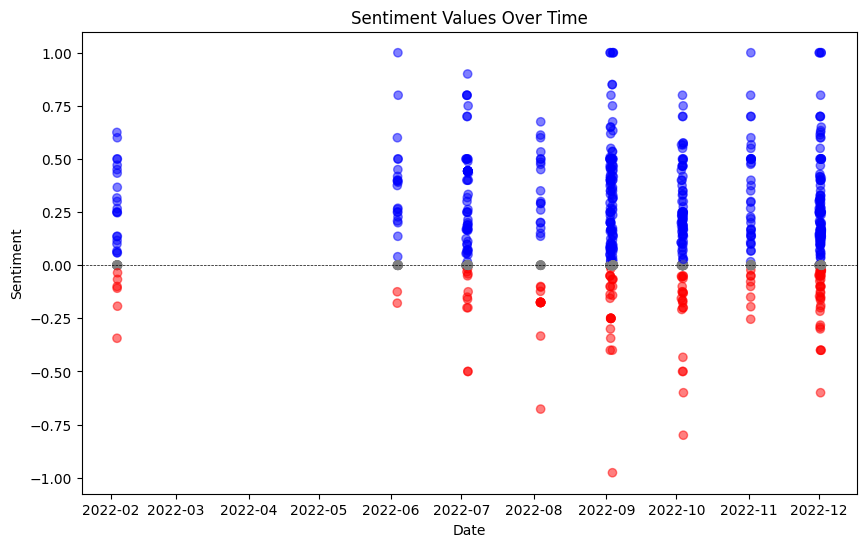

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')  # Adjust path if necessary

# Convert 'date' to datetime and coerce parsing errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where 'date' could not be converted
df = df.dropna(subset=['date'])

# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis to get polarity scores
df['Polarity'] = df['text'].apply(get_sentiment)

# Define colors based on sentiment
df['Color'] = df['Polarity'].apply(lambda x: 'blue' if x > 0 else ('red' if x < 0 else 'grey'))

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['Polarity'], c=df['Color'], alpha=0.5)

# Format the plot
plt.title('Sentiment Values Over Time')
plt.xlabel('Date')  # Just setting a generic label
plt.ylabel('Sentiment')
plt.axhline(y=0, color='black', linestyle='--', lw=0.5)  # Add a horizontal line at zero

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from textblob import TextBlob

# Load your dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')  # Adjust path if necessary

# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis to get polarity scores
df['Polarity'] = df['text'].apply(get_sentiment)

# Classify sentiments based on polarity
df['Sentiment'] = df['Polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Group by sentiment to calculate tweet count and average polarity
sentiment_summary = df.groupby('Sentiment').agg(Tweet_Count=('Sentiment', 'count'),
                                                 Average=('Polarity', 'mean')).reset_index()

# Sort by tweet count in descending order
sentiment_summary = sentiment_summary.sort_values('Tweet_Count', ascending=False)

# Resetting the index
sentiment_summary.reset_index(drop=True, inplace=True)

# Display the table
print(sentiment_summary)


  Sentiment  Tweet_Count   Average
0  Positive         1644  0.317125
1   Neutral         1313  0.000000
2  Negative          482 -0.196826


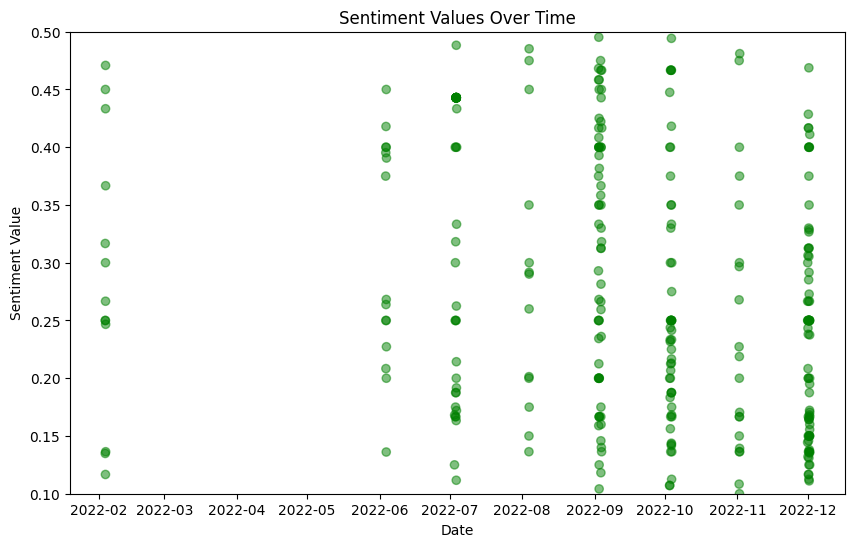

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')  # Adjust path if necessary

# Ensure 'date' is a datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where 'date' could not be converted
df = df.dropna(subset=['date'])

# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis to get polarity scores
df['Polarity'] = df['text'].apply(get_sentiment)

# Define colors based on sentiment
df['Color'] = df['Polarity'].apply(lambda x: 'green' if x > 0 else 'red')

# Plotting only a subset of the data if needed, based on the given range
df_subset = df[(df['Polarity'] > 0.1) & (df['Polarity'] < 0.5)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['date'], df_subset['Polarity'], c=df_subset['Color'], alpha=0.5)

# Format the plot
plt.title('Sentiment Values Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Value')
plt.ylim(0.1, 0.5)  # Set the limits of the y-axis if you need to focus on a specific range

# Show the plot
plt.show()


news article


In [ ]:
!pip install python-docx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

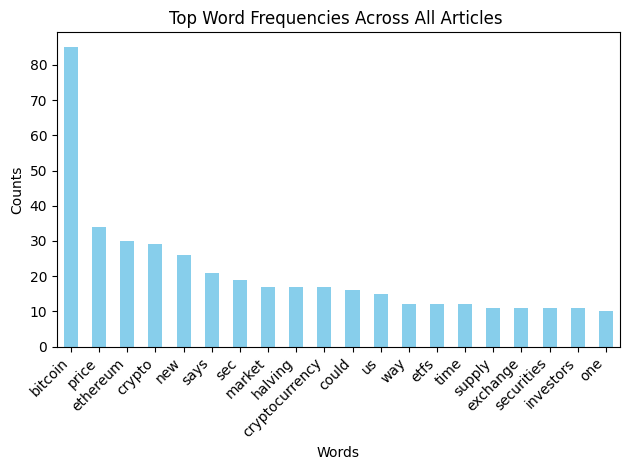

In [ ]:
from docx import Document
import re

def preprocess_document(doc_path):
    # Load the document
    doc = Document(doc_path)

    # Prepare a list to hold preprocessed words
    preprocessed_words = []

    # Regex pattern for word characters
    pattern = re.compile(r'\b\w+\b', re.UNICODE)

    for para in doc.paragraphs:
        # Find all words in the paragraph text
        words = pattern.findall(para.text.lower())
        # Extend the list with words from this paragraph
        preprocessed_words.extend(words)

    return preprocessed_words

# Aggregate words from all documents
all_words = []
for doc_path in doc_paths:
    all_words.extend(preprocess_document(doc_path))

# Remove stopwords
filtered_words = [word for word in all_words if word not in stop_words]

# Count the frequencies
word_freq = Counter(filtered_words)

# Convert to a DataFrame
df_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Plotting
top_n = 20
df_freq.head(top_n).plot.bar(x='Word', y='Count', legend=False, color='skyblue')
plt.title('Top Word Frequencies Across All Articles ')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')  # Adjust the x labels to show words clearly
plt.tight_layout()  # Make sure everything fits without overlapping
plt.show()


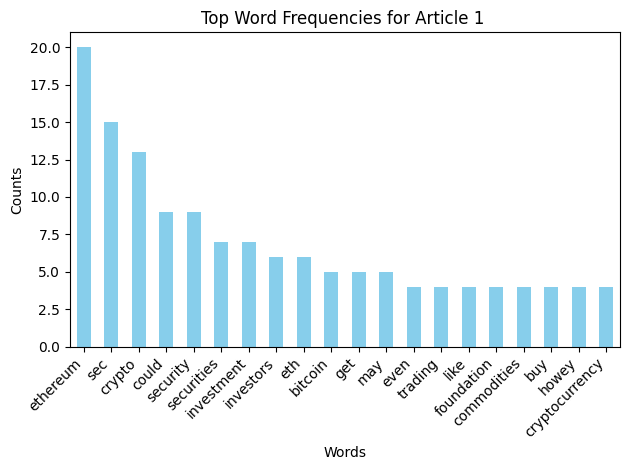

In [ ]:
from collections import Counter
from docx import Document
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess text: remove punctuation, lowercase, and remove stopwords
def preprocess_text(text):
    # Remove punctuation and numbers and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Split into words and filter out stopwords
    words = [word for word in text.split() if word not in stop_words]
    return words

# List of paths to your preprocessed docx files
doc_paths = [
    "/content/cleaned_doc_1.docx"
]

# Plot the word frequencies for each article
for i, doc_path in enumerate(doc_paths):
    # Load the document
    doc = Document(doc_path)

    # Preprocess and aggregate words for the current document
    words = []
    for para in doc.paragraphs:
        words.extend(preprocess_text(para.text))

    # Count the frequencies
    word_freq = Counter(words)

    # Convert to a DataFrame for easier plotting
    df_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

    # Plot the top N word frequencies for the current document
    top_n = 20
    df_freq.head(top_n).plot.bar(x='Word', y='Count', legend=False, color='skyblue')
    plt.title(f'Top Word Frequencies for Article {i+1} ')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


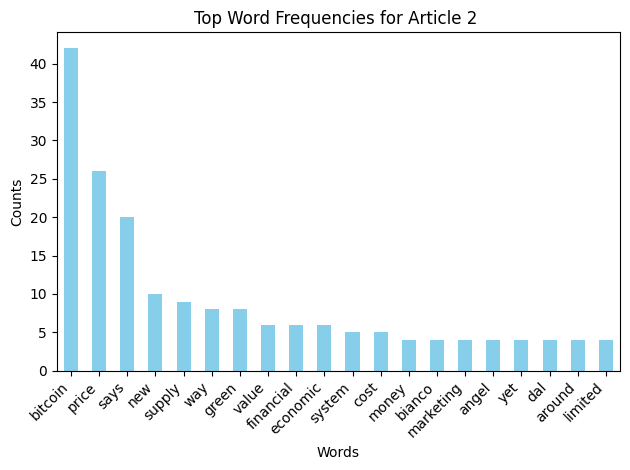

In [ ]:
from collections import Counter
from docx import Document
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess text: remove punctuation, lowercase, and remove stopwords
def preprocess_text(text):
    # Remove punctuation and numbers and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Split into words and filter out stopwords
    words = [word for word in text.split() if word not in stop_words]
    return words

# List of paths to your preprocessed docx files
doc_paths = [
    "/content/cleaned_doc_2.docx"
]

# Plot the word frequencies for each article
for i, doc_path in enumerate(doc_paths):
    # Load the document
    doc = Document(doc_path)

    # Preprocess and aggregate words for the current document
    words = []
    for para in doc.paragraphs:
        words.extend(preprocess_text(para.text))

    # Count the frequencies
    word_freq = Counter(words)

    # Convert to a DataFrame for easier plotting
    df_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

    # Plot the top N word frequencies for the current document
    top_n = 20
    df_freq.head(top_n).plot.bar(x='Word', y='Count', legend=False, color='skyblue')
    plt.title(f'Top Word Frequencies for Article {i+2} ')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


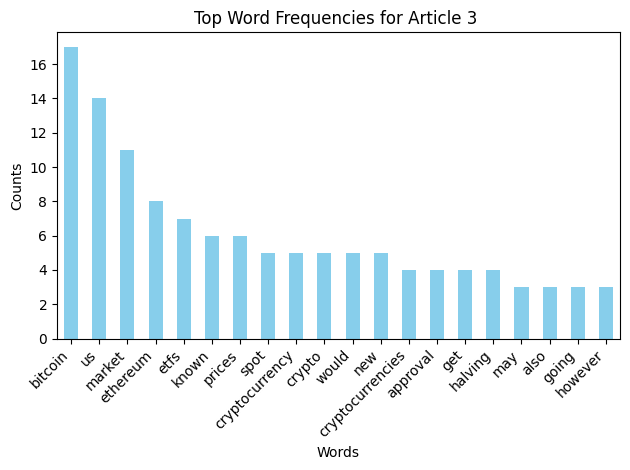

In [ ]:
from collections import Counter
from docx import Document
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess text: remove punctuation, lowercase, and remove stopwords
def preprocess_text(text):
    # Remove punctuation and numbers and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Split into words and filter out stopwords
    words = [word for word in text.split() if word not in stop_words]
    return words

# List of paths to your preprocessed docx files
doc_paths = [
    "/content/cleaned_doc_3.docx"
]

# Plot the word frequencies for each article
for i, doc_path in enumerate(doc_paths):
    # Load the document
    doc = Document(doc_path)

    # Preprocess and aggregate words for the current document
    words = []
    for para in doc.paragraphs:
        words.extend(preprocess_text(para.text))

    # Count the frequencies
    word_freq = Counter(words)

    # Convert to a DataFrame for easier plotting
    df_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

    # Plot the top N word frequencies for the current document
    top_n = 20
    df_freq.head(top_n).plot.bar(x='Word', y='Count', legend=False, color='skyblue')
    plt.title(f'Top Word Frequencies for Article {i+3} ')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


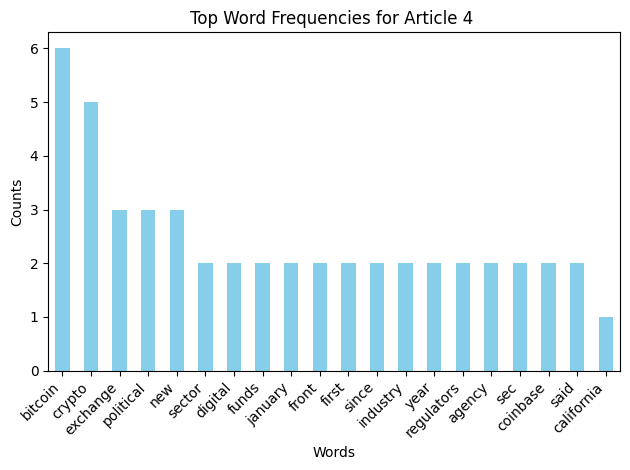

In [ ]:
from collections import Counter
from docx import Document
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess text: remove punctuation, lowercase, and remove stopwords
def preprocess_text(text):
    # Remove punctuation and numbers and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Split into words and filter out stopwords
    words = [word for word in text.split() if word not in stop_words]
    return words

# List of paths to your preprocessed docx files
doc_paths = [
    "/content/cleaned_doc_4.docx"
]

# Plot the word frequencies for each article
for i, doc_path in enumerate(doc_paths):
    # Load the document
    doc = Document(doc_path)

    # Preprocess and aggregate words for the current document
    words = []
    for para in doc.paragraphs:
        words.extend(preprocess_text(para.text))

    # Count the frequencies
    word_freq = Counter(words)

    # Convert to a DataFrame for easier plotting
    df_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

    # Plot the top N word frequencies for the current document
    top_n = 20
    df_freq.head(top_n).plot.bar(x='Word', y='Count', legend=False, color='skyblue')
    plt.title(f'Top Word Frequencies for Article {i+4} ')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


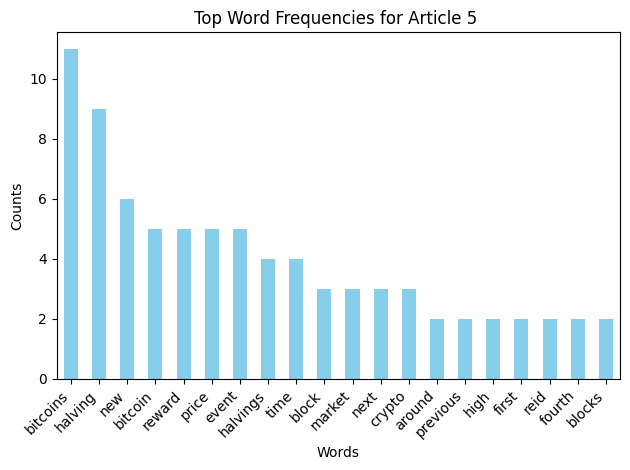

In [ ]:
from collections import Counter
from docx import Document
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Preprocess text: remove punctuation, lowercase, and remove stopwords
def preprocess_text(text):
    # Remove punctuation and numbers and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Split into words and filter out stopwords
    words = [word for word in text.split() if word not in stop_words]
    return words

# List of paths to your preprocessed docx files
doc_paths = [
    "/content/cleaned_doc_5.docx"
]

# Plot the word frequencies for each article
for i, doc_path in enumerate(doc_paths):
    # Load the document
    doc = Document(doc_path)

    # Preprocess and aggregate words for the current document
    words = []
    for para in doc.paragraphs:
        words.extend(preprocess_text(para.text))

    # Count the frequencies
    word_freq = Counter(words)

    # Convert to a DataFrame for easier plotting
    df_freq = pd.DataFrame(word_freq.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

    # Plot the top N word frequencies for the current document
    top_n = 20
    df_freq.head(top_n).plot.bar(x='Word', y='Count', legend=False, color='skyblue')
    plt.title(f'Top Word Frequencies for Article {i+5} ')
    plt.xlabel('Words')
    plt.ylabel('Counts')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming your documents are text files
document_paths = [
    '/content/cleaned_doc_1.docx',
    '/content/cleaned_doc_2.docx',
    '/content/cleaned_doc_3.docx',
    '/content/cleaned_doc_4.docx',
    '/content/cleaned_doc_5.docx'
]

# Read the content of each document into a list
document_texts = []
for path in document_paths:
    try:
        with open(path, 'r', encoding='utf-8') as file:
            document_texts.append(file.read())
    except UnicodeDecodeError:
        with open(path, 'r', encoding='ISO-8859-1') as file:
            document_texts.append(file.read())

# Create the vectorizer to compute TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')

# Compute the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(document_texts)

# Create a DataFrame for the TF-IDF matrix and set the words as columns
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the DataFrame
print(tfidf_df)

# Optionally, save the DataFrame to a CSV file
tfidf_df.to_csv('tfidf_scores.csv', index=False)


        04û        05    0aºàyx        0b      0dâw        0f     0ggiõ  \
0  0.000000  0.011009  0.000000  0.023104  0.011009  0.023104  0.000000   
1  0.000000  0.010662  0.000000  0.000000  0.010662  0.000000  0.022376   
2  0.000000  0.011163  0.023426  0.000000  0.011163  0.000000  0.000000   
3  0.025116  0.011968  0.000000  0.000000  0.011968  0.000000  0.000000   
4  0.000000  0.011788  0.000000  0.000000  0.011788  0.000000  0.000000   

        0hê        0j        0n  ...       ÿôt      ÿôuë       ÿöv        ÿø  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.011009  0.000000   
1  0.000000  0.000000  0.022376  ...  0.000000  0.000000  0.010662  0.000000   
2  0.023426  0.000000  0.000000  ...  0.000000  0.000000  0.011163  0.000000   
3  0.000000  0.000000  0.000000  ...  0.020263  0.025116  0.011968  0.000000   
4  0.000000  0.024738  0.000000  ...  0.019959  0.000000  0.011788  0.024738   

         ÿû       ÿûq        ÿý     ÿýÿþï        ÿþ        ÿÿ  
0  0

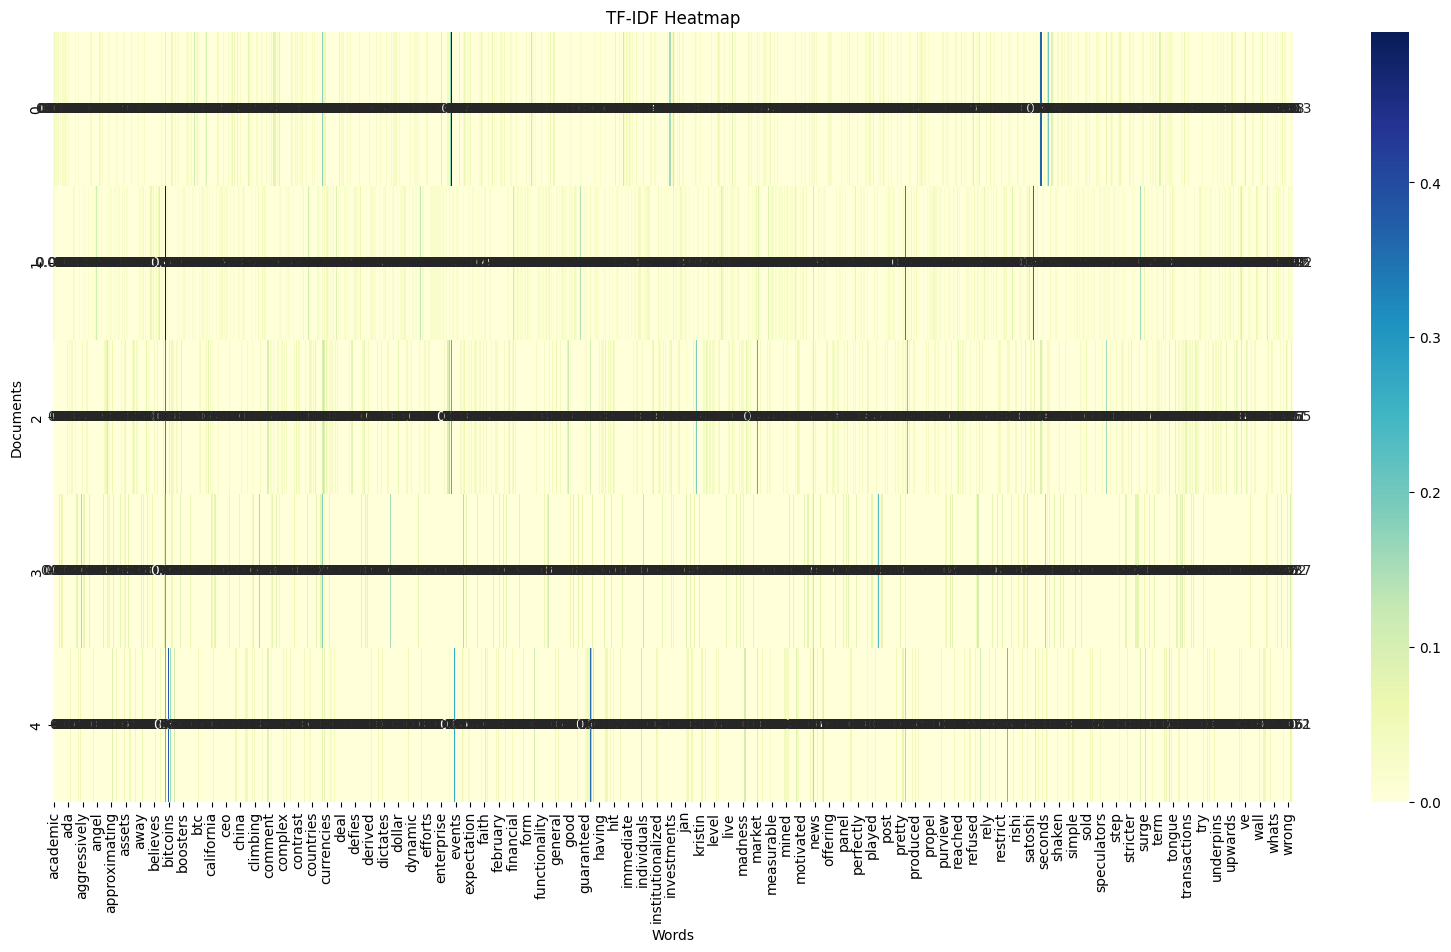

In [ ]:
!pip install scikit-learn seaborn matplotlib

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# List of document contents
# Replace the following list with your actual documents content
documents = [
    "The SEC Has Ethereum in Its Sights. Here's What It Means for Investors The Securities and Exchange Commission (SEC) has issued subpoenas to various companies about their dealings with the Ethereum Foundation, according to Fortune and Bloomberg. The probe has sparked speculation that the SEC may want to label Ethereum as a security. It is early days, and the SEC has refused to comment. However, this question of how Ethereum is classified could have a huge impact on the whole crypto industry. Cryptocurrencies: Commodity or security in seconds Right now, most cryptos are classed as commodities and come under the purview of the Commodity Futures Trading Commission (CFTC). The SEC insists that many cryptocurrencies -- including Solana (SOL), Cardano (ADA), and Polygon (MATIC) -- are, in fact, unregistered securities. Here's how commodities and securities differ: Commodities: These are physical goods like oil, gold, silver, wheat, and corn. They are often traded as futures contracts on commodity exchanges. Securities: These are investment products like stocks, bonds, and mutual funds. Investors can buy and sell them at stock brokers registered as broker-dealers with the SEC. If a product is a security, there are strict rules about what information it needs to report and how it can be bought and sold. Hence, a slew of SEC charges against top cryptocurrency exchanges for trading what it's dubbed 'crypto asset securities.' Why the SEC may think Ethereum is a security The SEC uses what's known as the Howey test to determine whether a product could be classed as a security. It says, 'An 'investment contract' exists when there is the investment of money in a common enterprise with a reasonable expectation of profits to be derived from the efforts of others.' OUR TOP CRYPTO PLAY ISN'T A TOKEN - HERE’S WHY We’ve found one company that’s positioned itself perfectly as a long-term picks-and-shovels solution for the broader crypto market — Bitcoin, Dogecoin, and all the others. In fact, you've probably used this company's technology in the past few days, even if you've never had an account or even heard of the company before. That's how prevalent it's become. Sign up today for Stock Advisor and get access to our exclusive report where you can get the full scoop on this company and its upside as a long-term investment. Learn more and get started today with a special new member discount. The SEC doesn't consider Bitcoin (BTC) to be a security. The decentralized nature of Bitcoin means it does not meet the common enterprise requirement of the Howey test. Plus, it has an anonymous founder who is not involved in the foundation behind it. In contrast, Ethereum's figurehead, Vitalik Buterin, is far from anonymous. On top of this, the Ethereum Foundation takes an active role in promoting and supporting activity on the blockchain. If the SEC's investigators decide this constitutes a common enterprise, it could check one of the four Howey boxes. The SEC also argues that proof-of-stake (PoS) cryptos offer a reasonable expectation of profits. Staking means participants can tie up their coins and earn rewards for contributing to the network. Ethereum moved to PoS in , which was an extraordinary technological feat. But the fact that investors can now expect to profit from staking their ETH could check another Howey test box. Why Ethereum's classification matters All this talk of commodities and securities may feel like semantics. After all, if you own Ethereum, why does it matter who has oversight? Unfortunately, the answer could transform the crypto industry in the U.S. Here are just two potential impacts. . It could change how you buy or sell Ethereum If Ethereum is classed as a security, we'd see much stricter controls on how you can buy and sell Ethereum. One crypto attorney told CoinDesk it would be 'devastating' for American investors. For example, centralized cryptocurrency exchanges are not registered with the SEC. They may have to delist Ethereum, which accounts for almost % of the crypto market. Moreover, it isn't clear what it would mean for the many cryptocurrency projects and NFT markets that are built on the Ethereum blockchain. They rely on ETH for gas fees and payments. It's hard to imagine how you'd use a registered security to pay gas fees. Securities aren't set up to work that way. Imagine you own Apple stock and try to use a fraction of it to buy a coffee or pay a bank fee. What crypto investors can do If the SEC decides to pursue a case against Ethereum, be prepared for fallout in both the short and longer term. If you are a buy-and-hold investor, consider how the regulatory issues fit with your long-term investment thesis for ETH. Not only could it make it a riskier investment, regulatory changes could affect the functionality of the Ethereum blockchain. If you want to hold your ETH, irrespective of any SEC actions, think about storage. In a worst-case scenario, your crypto exchange or broker may restrict ETH trading. How will you manage that? For example, if you'll move your ETH to a crypto wallet that you control, make sure it is set up and you know it works. . Spot Ethereum ETFs look less likely The more immediate impact of the recent news is that a spot Ethereum ETF is less likely to get the green light. The SEC recently approved several spot Bitcoin ETFs, sparking an influx of institutional money and pushing BTC to a new high. Hopes of a similar Ethereum ETF approval are fading fast. Bottom line This isn't the first time regulators have shaken the security stick at Ethereum. Even so, it's unlikely, but not impossible, that it will take further action. All we know is that the regulator is asking questions about how the foundation works. That's a long way from bringing charges and even further from any court ruling, which could take years to play out. The biggest takeaway for investors is that regulatory uncertainty makes cryptocurrency a more precarious investment. Don't forget that countries like China have all but banned crypto altogether. Keep your ear to the ground and have a plan so you can act fast if anything changes. This award winning broker is now offering commission crypto trading! This top-rated broker now offers easy access to the most popular cryptocurrencies including Bitcoin, Ethereum, Dogecoin, and more. Plus, you can get up to .% more crypto and trade your favorite stocks with this all-in-one platform!",
    "Whats Behind the Bitcoin Price Surge? Vibes, Mostly BITCOIN FEVER HAS returned. On March , the price of the cryptocurrency swelled to a record high—and has continued its upward march. In  it has provided investors with a greater return than almost any other asset. But as enthusiasm for  spreads anew, so do  around the forces moving the price. In the last month alone, the price of bitcoin has . The surge has been celebrated in crypto circles as an inevitable return to form—the fun part of a predictable boom-and-bust cycle. The phrases “” and “it’s just math” have long been adopted as tongue-in-cheek mantras by crypto believers and ironic insults by its skeptics. Yet they capture a belief among hardliners that the economic architecture of the Bitcoin system—whereby a fixed supply of  million coins and predetermined schedule of release is hardcoded into the software—will inevitably propel the price upwards over time. They see scarcity as an antidote to runaway inflation of traditional currencies, which deteriorate in value, and unsustainable levels of debt taken on by governments across the globe. Bitcoin is currently trading at over , per coin; proponents like Samson Mow, CEO of bitcoin-centric technology firm JAN, have said they expect that value to reach as high as  million in the immediate future. “Money is fundamentally broken,” he told WIRED in November. The jubilation and told-you-sos, however, drown out difficult questions around what it means to place a price on cryptocurrency. The proposition is deceptively tricky, says James Angel, an economist at Georgetown University specializing in financial markets, because bitcoin defies conventional valuation methods. There is no company behind Bitcoin whose performance can be analyzed. It does not generate revenue. It is not widely used to make payments or for any secondary purpose. It is not issued by any government. It resists easy comparisons. But one thing is certain, says Angel: “A limited supply does not equate to infinite value. BITCOIN, in the wake of a global financial crisis. It was born of a frustration with the stewards of the world economy and the behavior of large banks and financial institutions, whose reckless financial engineering set the stage for the meltdown. The new form of “electronic cash” was designed in such a way as to take control over monetary policy—the way money enters and is removed from circulation—away from central banks, imposing hard limits on supply and the schedule by which new coins were released. “The root problem with conventional currency is all the trust that's required to make it work,” wrote Satoshi Nakamoto, the elusive , in a . “The central bank must be trusted not to debase the currency, but the history of fiat currencies is full of breaches of that trust.” If bitcoin could gain a foothold as a globally recognized money, Satoshi and their early collaborators hoped, nobody’s savings could be devalued by the policy of any bank or government. The emergence of bitcoin has given way to a body of academic literature dedicated to the slippery problem of assigning a value to this new type of asset. The issue, says Silvia Dal Bianco, an economist at University College London, is that bitcoin defies easy definition. An analysis of the value of bitcoin, she says, to some extent “depends on what we think bitcoin is.” To date, bitcoin has not been adopted widely as a way to purchase goods and services. Therefore, bitcoiners who believe its price will rise tend to emphasize its potential as a —a commodity whose limited supply allows owners to hedge against inflation and general economic calamity. That argument may have some merit on its own. But social media hype  flattens the nuances of bitcoin’s deflationary properties to something approximating: “The limited supply of bitcoin will drive up the price.” That’s where the “number go up” philosophy  from. But the fixed supply of bitcoin, says Angel, was priced in long ago. “In a well-functioning market, anything everybody already knows should already beincorporated into the price today.” A prominent misconception about bitcoin’s supply dynamics is that a process called the halving—whereby the amount of new bitcoin released into circulation is cut in half roughly every four years—is guaranteed to push the price upwards. The next halving is due to take place next month, prompting  about yet another rise in price. But the fact that each previous halving has been followed by an upswing has more to do with self-fulfilling speculation, says Angel, than any economic mechanism of the Bitcoin system. The closest thing bitcoin has to fundamentals—characteristics that can be used to reach a solid valuation—is the cost of producing new coins, says Dal Bianco. In the same way the price of gold is linked to a degree to the cost of clawing ore from the ground, the price of bitcoin should at least loosely mirror the hardware and energy costs associated with mining new bitcoin. Yet the design of the system means bitcoin resists this method for valuation too. To ensure new supply is released at a steady rate, producing bitcoin becomes more computationally intensive—and therefore more expensive—as the level of competition among miners increases, and vice versa. If the price of bitcoin rises, more miners are drawn to participate, increasing the cost for all. Therefore, as Satoshi  in a  forum post, the price of bitcoin “dictates the cost of production more than the other way around.” Detached from measurable fundamentals and real-world utility, fluctuations in the price of bitcoin reflect not much more than a collective belief that the price will either rise or fall. “It’s about what people think about bitcoin—it’s about animal spirits,” says Dal Bianco. That mentality isn’t limited to cryptocurrency; in , investors , sending the prices skyward. Buyers were no longer betting on the prospects of the underlying businesses, only on further increases in price. The latest surge in the price of bitcoin is increasing the clamor around it, says Dal Bianco, drawing in yet more speculators and creating a “self-reinforcing cycle.” Likewise, when collective confidence in the prospect of further price growth falters, she says, the resultant downturn can be equally sudden. Under these conditions, demand can vanish as rapidly as it forms. ON MARCH , Michael Green, chief strategist at asset management firm Simplify,  a wager with Peter McCormack, host of the podcast What Bitcoin Did. They were betting on the price of bitcoin. Green wagered , that bitcoin would not reach a price of , per coin by the end of the year. McCormack wagered , that it would. The bet, Green says, was in part motivated by a desire to highlight areas of weakness in the economic theory presented as dogma by bitcoin evangelists. He takes issue with the way bitcoin is being sold to the investing public as “a store of value designed ultimately to be the currency of the future,” he says. “I think that is a bunch of economic nonsense.” Because the supply of bitcoin will shrink steadily over time as people lose access to irrecoverable wallets, Green argues, it cannot support a system of credit, because the cost of borrowing will eventually rise to a point that almost no one can afford. In January, US regulators approved the first batch of bitcoin exchange-traded funds, which give people a way to invest in the cryptocurrency through a brokerage, as they would a regular stock. The arrival of bitcoin ETFs is said to have catalyzed the latest surge in price, by unlocking a wave of pent-up demand among investors—both institutions and regular people—previously unable or unwilling to deal with a crypto exchange or . In approving the new bitcoin funds, says Green, regulators have incentivized financial institutions for whom the ETFs represent a new source of revenue to “spend tons of money on marketing to drive demand,” and in turn disincentivized any emphasis on deficiencies in the logic of bitcoinomics. The belief in the future potential of bitcoin has become religious, says Green. That missionary zeal is more likely to influence the price, says Green, than any economic mechanism built into the system. Even if McCormack were to lose the wager, he says, it could be chalked up as a fruitful marketing expense. McCormack told WIRED the wager with Green was not a marketing stunt. “I did the bet to prove him wrong,” he says. The influence of evangelism on the price of bitcoin limits the opportunity for good-faith debate about the prospects of the Bitcoin system, says Angel.“Once you drink the Kool-Aid, you have a powerful financial incentive to preach to the world that bitcoin is the most wonderful thing,” he says. “If there were a Nobel prize in marketing, it should be given to Satoshi Nakamoto.”Bitcoin’s biggest boosters embrace that dynamic as well. “Bitcoin price appreciation is an advertisement,” says Mow. Investors buy in on the prospect of riches—and then fall down the “rabbit hole” themselves, creating a new generation of believers to spread the Bitcoin gospel.",
    "With bitcoin hitting new highs, it’ll likely reach the US, milestone before  is out Cryptocurrencies are surging again. Bitcoin has just hit an all-time high of more than US, (,), pushing past the level of circa US, where it turned back during its last bull phase in late. Other top cryptocurrencies like ethereum and solana have reached their highest prices in three years, on the back of a run that has been going since the autumn. The value of the whole cryptocurrency market has raced up to US. trillion, triple what it was worth at the beginning of  and not far off its previous US trillion peak. Much of this run has occurred at a time when the US dollar has been strengthening against other currencies (though it has fallen in the past couple of weeks). This can often be a time when cryptocurrencies get weaker, so it shows how strong they have been lately. Many other fiat currencies around the world have been losing value against the US dollar during this period, so bitcoin reached all-time highs in many of them long before it finally took out its high in the US currency. So what has contributed to this explosion in prices and where is the market going for the rest of ? Bitcoin ETFs A major driver for this appreciation in prices has been the US authorities’ approval in January of an investment vehicle known as an exchange-traded fund or ETF for the general or “spot” bitcoin market. An ETF is an easy way for the average saver to get exposure to an asset, since they buy shares in the vehicle, usually through their financial advisor, rather than having to go to the trouble of buying the underlying asset. A total of  bitcoin ETFs were approved in the US, and their daily trading volume has now exceeded US billion – driven by frontrunners Blackrock and Fidelity Investments. This demonstrates the large interest from traditional market participants, and as the spot ETFs become more mature, their providers will offer more promotional material and education to get more customers onboard. The cryptocurrency market is always adapting and innovating, and one possible future innovation is the offer of option contracts on the new spot ETFs. Options allow traders to hedge their bets on whether the crypto market will go up or down, and would likely attract even more new money into the space. However, US regulator the Securities and Exchange Commission (SEC) has just postponed a decision on this innovation until late April. Some experts think approval may take longer than that as it is unclear which regulatory body would be responsible for policing this new class of derivative contracts. The bitcoin halving One feature of the bitcoin system which was built in at the beginning is that, roughly every four years, the rewards to companies using arrays of computers to create or “mine” bitcoin get cut in half. The last halving took place in May , where miners went from receiving . bitcoin for each unit of work they do to . bitcoin. The next is due to take place on April , cutting the reward down to . bitcoin. Because each halving means less new bitcoin coming on to the market, they have coincided with strong price appreciation in the cryptocurrency. What isn’t clear is whether this is already priced in and therefore not actually the reason price is going up. One theory is that the institutions behind the spot ETFs are buying aggressively now because they know there will be less bitcoin on the open market once the halving takes place. Ethereum prospects Meanwhile, the crypto market could also be boosted by spot ETFs for the ethereum cryptocurrency system in the coming months. At least ten firms, including Blackrock and Fidelity, have applied to launch them and the SEC has until May to make a decision. Whereas the online ledger that underpins bitcoin, known as its blockchain, has been seen largely as a store of value, ethereum has become the leading blockchain for developers to write applications using this technology. SEC Chair Gary Gensler believes that most cryptocurrencies should be treated differently to bitcoin, as financial instruments known as securities rather than as more straightforward commodities. This adds complexity to the ethereum ETF approval process. If the US authorities were to decide it was the case, it would mean that ETFs couldn’t buy ethereum from crypto exchanges until those exchanges had received approval to trade it as a security. While that uncertainty continues, ethereum could be boosted by the so-called Dencun upgrade (also known as Duncan or EIP-). Ethereum has competition from other blockchains such as solana and avalanche due to its relatively slow transaction speed and high costs. It already completed its first major step in a long-term plan to reduce costs and cope with many more users (known as scalability) when it transitioned in  to a different system for verifying transactions known as proof of stake. The Dencun upgrade, which goes live on March , will further improve scalability by making data storage more efficient on the network, while also lowering transaction fees. Where next Predicting cryptocurrency prices is not for the faint-hearted. The market is very volatile, and often exceeds expectations when it goes up or down. The behaviour of individuals determines market prices and, as Isaac Newton put it, you can “calculate the motions of heavenly bodies, but not the madness of the people”. However, the majority of commentators expect crypto prices to keep rising over the coming months. Election years tend to be good for investments in general, while a second Trump administration would probably create a more favourable regulatory environment for crypto assets (as would a Rishi Sunak victory in the UK, however unlikely that seems at present). As bitcoin becomes more and more mainstream and integrated with traditional assets, it isn’t inconceivable that it could hit US, in  – an extraordinary feat for a invention that was worth nothing as recently as .",
    "Bitcoin’s Winning Streak Continues The price of Bitcoin hovered around , on Tuesday, extending a rally that has helped mint a new crop of crypto billionaires.The cryptocurrency has climbed by more than  percent since the Securities and Exchange Commission approved the first Bitcoin exchange traded funds in January, bringing a wave of mainstream investors into crypto trading. Coinbase, a Nasdaq-listed crypto exchange, has seen its stock surge alongside Bitcoin this year. The company is pushing for more favorable treatment by regulators, suing the S.E.C. and accusing it of “capricious” behavior. It said in its suit that the agency has shirked its responsibility to write clear rules on how the industry should operate. Tough tactics have worked before. Grayscale Investments, a digital asset manager, sued the S.E.C. last year after the regulator denied its application for a Bitcoin exchange-traded fund. A panel of judges agreed that the agency acted arbitrarily, a ruling that paved the way for the approval in January of new Bitcoin funds. The industry is also flexing its political muscle. Coinbase and others backed a network of well-funded political action committees that some believe played a role in felling Representative Katie Porter, Democrat of California, a crypto skeptic who lost her race to be the party’s nominee for the Senate. The sector is now looking at new targets to boost or topple. “The crypto advocacy community is feeling pretty good right now,” said Kristin Smith, chief executive of the Blockchain Association, a trade group. “For the first time since Bitcoin was created  years ago, we have the tools in place, on the policy front and the political front.” The sector got another shot in the arm on Monday when Travis Hill, vice chair of the Federal Deposit Insurance Corporation, called on regulators to ease restrictions on how banks handle customers’ digital assets.",
    "Bitcoin is about to undergo another 'halving' event - here's what that means It's been a big year for . In January, the Securities and Exchange Commission finally gave its  after months of speculation. Then in February following month, the token surged nearly % — and on Tuesday, its price hit a new record high of more than , for the first time since November. Next on the horizon is the fourth bitcoin halving (or halvening, if you prefer your crypto events to sound like ), which is set to take place next month. What is the halving? New bitcoins are produced by a  where computers solve complex mathematical problems to validate and secure transactions on the cryptocurrency's network. In a halving event, the reward for mining new blocks is cut in half. Halvings are scheduled to happen once every , blocks — and it typically takes around four years to mine that amount. The halving's purpose is to gradually reduce the rate at which new bitcoins are generated, ultimately capping the total supply at  million, as laid out in the cryptocurrency's. During bitcoin's lifespan, there have been three previous halvings: In the first halving, in November , the reward for each mined block fell from  bitcoins to  bitcoins. In the second halving, in July , the reward dropped again to . bitcoins. In May , the reward was again halved, this time to . bitcoins per block. Analysts expect the next halving event, where the reward will fall once more to . bitcoins per block, to happen in April. How will it affect bitcoin's price? The halving is designed to maintain bitcoin's scarcity — and simple market economics dictate that an asset's price benefits from supply falling. Previous halvings have been no exception to that rule, with bitcoin climbing to new highs in the aftermath of each event. Last time out, its price surged from under , to about , in under a year. Some on Wall Street aren't so confident the cryptocurrency will repeat that feat. JPMorgan warned last week its price could fall , or over a third, this time around due to higher production costs. But perhaps the fact that the world's largest bank by market value is paying attention to what was at one point a niche crypto market event is a sign of how high bitcoin's stock has risen in recent years. More ETFs are coming, which is increasingly institutionalizing the crypto asset class, Deutsche Bank's Jim Reid said Thursday in a research note."
"Other things to watch are the fourth bitcoin halving in April, where the new coins available to miners halves to maintain scarcity, and also more clarity on regulation coming up."
"Whether you're a cynic or a convert, whether you think it's cheap or in a bubble, what's clear is that bitcoin is becoming increasingly institutionalized,Reid added.",
]

# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Apply the vectorizer to the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(tfidf_df, annot=True, cmap="YlGnBu")
plt.title('TF-IDF Heatmap')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()


In [ ]:
!pip install pytesseract
!apt install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (14.6 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


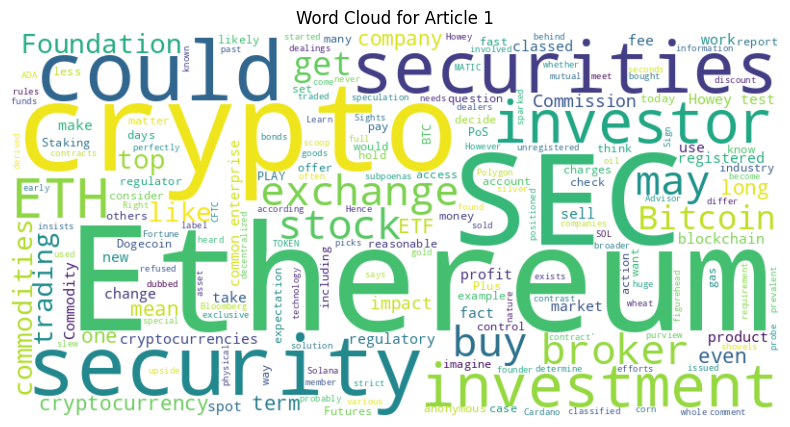

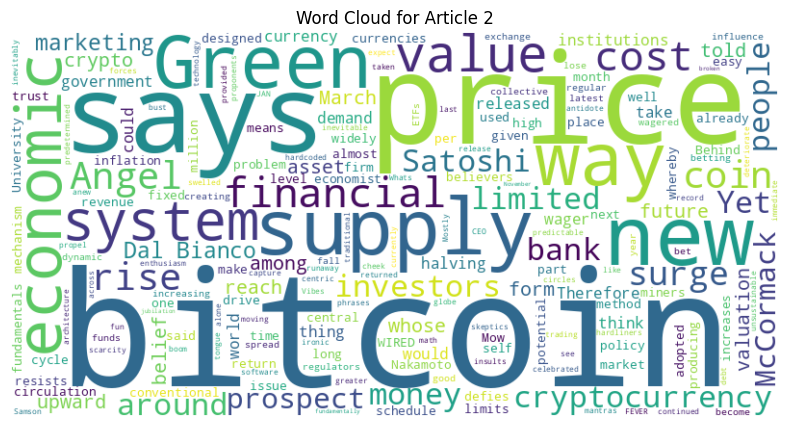

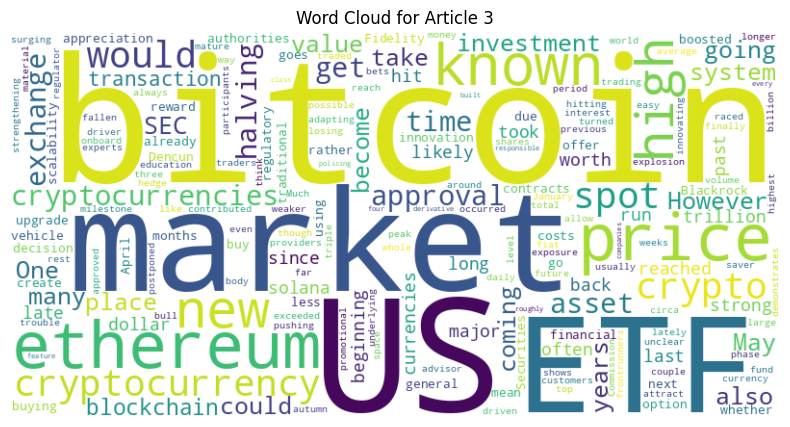

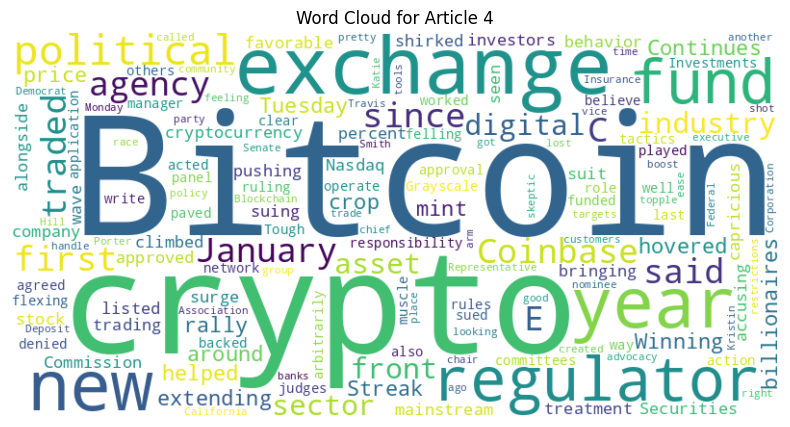

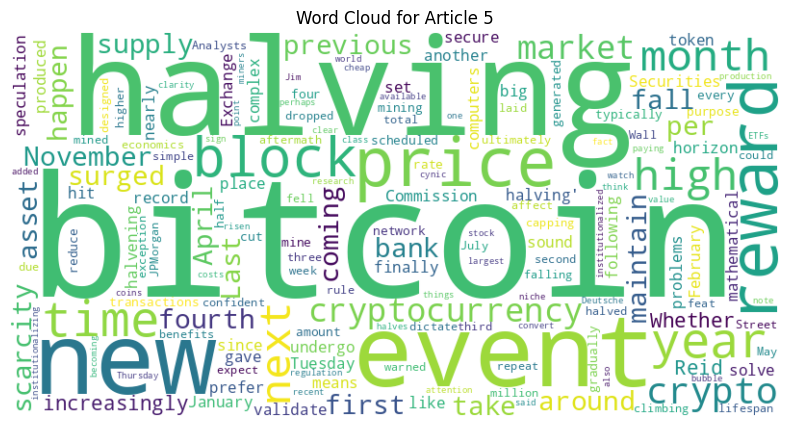

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import docx

# Download the list of stopwords if you haven't already
import nltk
nltk.download('stopwords')

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Paths to your .docx files
file_paths = [
    '/content/cleaned_doc_1.docx',
    '/content/cleaned_doc_2.docx',
    '/content/cleaned_doc_3.docx',
    '/content/cleaned_doc_4.docx',
    '/content/cleaned_doc_5.docx',
]

# Function to extract text from a docx file
def get_text_from_docx(file_path):
    doc = docx.Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return ' '.join(full_text)

# Generate a word cloud for each file
for i, file_path in enumerate(file_paths):
    text = get_text_from_docx(file_path)

    # Create and generate a word cloud image
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        stopwords=stop_words
    ).generate(text)

    # Display the generated word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Article {i+1}')
    plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Sample documents
# Replace with your actual document content
documents = [
    "The SEC Has Ethereum in Its Sights. Here's What It Means for Investors The Securities and Exchange Commission (SEC) has issued subpoenas to various companies about their dealings with the Ethereum Foundation, according to Fortune and Bloomberg. The probe has sparked speculation that the SEC may want to label Ethereum as a security. It is early days, and the SEC has refused to comment. However, this question of how Ethereum is classified could have a huge impact on the whole crypto industry. Cryptocurrencies: Commodity or security in seconds Right now, most cryptos are classed as commodities and come under the purview of the Commodity Futures Trading Commission (CFTC). The SEC insists that many cryptocurrencies -- including Solana (SOL), Cardano (ADA), and Polygon (MATIC) -- are, in fact, unregistered securities. Here's how commodities and securities differ: Commodities: These are physical goods like oil, gold, silver, wheat, and corn. They are often traded as futures contracts on commodity exchanges. Securities: These are investment products like stocks, bonds, and mutual funds. Investors can buy and sell them at stock brokers registered as broker-dealers with the SEC. If a product is a security, there are strict rules about what information it needs to report and how it can be bought and sold. Hence, a slew of SEC charges against top cryptocurrency exchanges for trading what it's dubbed 'crypto asset securities.' Why the SEC may think Ethereum is a security The SEC uses what's known as the Howey test to determine whether a product could be classed as a security. It says, 'An 'investment contract' exists when there is the investment of money in a common enterprise with a reasonable expectation of profits to be derived from the efforts of others.' OUR TOP CRYPTO PLAY ISN'T A TOKEN - HERE’S WHY We’ve found one company that’s positioned itself perfectly as a long-term picks-and-shovels solution for the broader crypto market — Bitcoin, Dogecoin, and all the others. In fact, you've probably used this company's technology in the past few days, even if you've never had an account or even heard of the company before. That's how prevalent it's become. Sign up today for Stock Advisor and get access to our exclusive report where you can get the full scoop on this company and its upside as a long-term investment. Learn more and get started today with a special new member discount. The SEC doesn't consider Bitcoin (BTC) to be a security. The decentralized nature of Bitcoin means it does not meet the common enterprise requirement of the Howey test. Plus, it has an anonymous founder who is not involved in the foundation behind it. In contrast, Ethereum's figurehead, Vitalik Buterin, is far from anonymous. On top of this, the Ethereum Foundation takes an active role in promoting and supporting activity on the blockchain. If the SEC's investigators decide this constitutes a common enterprise, it could check one of the four Howey boxes. The SEC also argues that proof-of-stake (PoS) cryptos offer a reasonable expectation of profits. Staking means participants can tie up their coins and earn rewards for contributing to the network. Ethereum moved to PoS in , which was an extraordinary technological feat. But the fact that investors can now expect to profit from staking their ETH could check another Howey test box. Why Ethereum's classification matters All this talk of commodities and securities may feel like semantics. After all, if you own Ethereum, why does it matter who has oversight? Unfortunately, the answer could transform the crypto industry in the U.S. Here are just two potential impacts. . It could change how you buy or sell Ethereum If Ethereum is classed as a security, we'd see much stricter controls on how you can buy and sell Ethereum. One crypto attorney told CoinDesk it would be 'devastating' for American investors. For example, centralized cryptocurrency exchanges are not registered with the SEC. They may have to delist Ethereum, which accounts for almost % of the crypto market. Moreover, it isn't clear what it would mean for the many cryptocurrency projects and NFT markets that are built on the Ethereum blockchain. They rely on ETH for gas fees and payments. It's hard to imagine how you'd use a registered security to pay gas fees. Securities aren't set up to work that way. Imagine you own Apple stock and try to use a fraction of it to buy a coffee or pay a bank fee. What crypto investors can do If the SEC decides to pursue a case against Ethereum, be prepared for fallout in both the short and longer term. If you are a buy-and-hold investor, consider how the regulatory issues fit with your long-term investment thesis for ETH. Not only could it make it a riskier investment, regulatory changes could affect the functionality of the Ethereum blockchain. If you want to hold your ETH, irrespective of any SEC actions, think about storage. In a worst-case scenario, your crypto exchange or broker may restrict ETH trading. How will you manage that? For example, if you'll move your ETH to a crypto wallet that you control, make sure it is set up and you know it works. . Spot Ethereum ETFs look less likely The more immediate impact of the recent news is that a spot Ethereum ETF is less likely to get the green light. The SEC recently approved several spot Bitcoin ETFs, sparking an influx of institutional money and pushing BTC to a new high. Hopes of a similar Ethereum ETF approval are fading fast. Bottom line This isn't the first time regulators have shaken the security stick at Ethereum. Even so, it's unlikely, but not impossible, that it will take further action. All we know is that the regulator is asking questions about how the foundation works. That's a long way from bringing charges and even further from any court ruling, which could take years to play out. The biggest takeaway for investors is that regulatory uncertainty makes cryptocurrency a more precarious investment. Don't forget that countries like China have all but banned crypto altogether. Keep your ear to the ground and have a plan so you can act fast if anything changes. This award winning broker is now offering commission crypto trading! This top-rated broker now offers easy access to the most popular cryptocurrencies including Bitcoin, Ethereum, Dogecoin, and more. Plus, you can get up to .% more crypto and trade your favorite stocks with this all-in-one platform!",
    "Whats Behind the Bitcoin Price Surge? Vibes, Mostly BITCOIN FEVER HAS returned. On March , the price of the cryptocurrency swelled to a record high—and has continued its upward march. In  it has provided investors with a greater return than almost any other asset. But as enthusiasm for  spreads anew, so do  around the forces moving the price. In the last month alone, the price of bitcoin has . The surge has been celebrated in crypto circles as an inevitable return to form—the fun part of a predictable boom-and-bust cycle. The phrases “” and “it’s just math” have long been adopted as tongue-in-cheek mantras by crypto believers and ironic insults by its skeptics. Yet they capture a belief among hardliners that the economic architecture of the Bitcoin system—whereby a fixed supply of  million coins and predetermined schedule of release is hardcoded into the software—will inevitably propel the price upwards over time. They see scarcity as an antidote to runaway inflation of traditional currencies, which deteriorate in value, and unsustainable levels of debt taken on by governments across the globe. Bitcoin is currently trading at over , per coin; proponents like Samson Mow, CEO of bitcoin-centric technology firm JAN, have said they expect that value to reach as high as  million in the immediate future. “Money is fundamentally broken,” he told WIRED in November. The jubilation and told-you-sos, however, drown out difficult questions around what it means to place a price on cryptocurrency. The proposition is deceptively tricky, says James Angel, an economist at Georgetown University specializing in financial markets, because bitcoin defies conventional valuation methods. There is no company behind Bitcoin whose performance can be analyzed. It does not generate revenue. It is not widely used to make payments or for any secondary purpose. It is not issued by any government. It resists easy comparisons. But one thing is certain, says Angel: “A limited supply does not equate to infinite value. BITCOIN, in the wake of a global financial crisis. It was born of a frustration with the stewards of the world economy and the behavior of large banks and financial institutions, whose reckless financial engineering set the stage for the meltdown. The new form of “electronic cash” was designed in such a way as to take control over monetary policy—the way money enters and is removed from circulation—away from central banks, imposing hard limits on supply and the schedule by which new coins were released. “The root problem with conventional currency is all the trust that's required to make it work,” wrote Satoshi Nakamoto, the elusive , in a . “The central bank must be trusted not to debase the currency, but the history of fiat currencies is full of breaches of that trust.” If bitcoin could gain a foothold as a globally recognized money, Satoshi and their early collaborators hoped, nobody’s savings could be devalued by the policy of any bank or government. The emergence of bitcoin has given way to a body of academic literature dedicated to the slippery problem of assigning a value to this new type of asset. The issue, says Silvia Dal Bianco, an economist at University College London, is that bitcoin defies easy definition. An analysis of the value of bitcoin, she says, to some extent “depends on what we think bitcoin is.” To date, bitcoin has not been adopted widely as a way to purchase goods and services. Therefore, bitcoiners who believe its price will rise tend to emphasize its potential as a —a commodity whose limited supply allows owners to hedge against inflation and general economic calamity. That argument may have some merit on its own. But social media hype  flattens the nuances of bitcoin’s deflationary properties to something approximating: “The limited supply of bitcoin will drive up the price.” That’s where the “number go up” philosophy  from. But the fixed supply of bitcoin, says Angel, was priced in long ago. “In a well-functioning market, anything everybody already knows should already beincorporated into the price today.” A prominent misconception about bitcoin’s supply dynamics is that a process called the halving—whereby the amount of new bitcoin released into circulation is cut in half roughly every four years—is guaranteed to push the price upwards. The next halving is due to take place next month, prompting  about yet another rise in price. But the fact that each previous halving has been followed by an upswing has more to do with self-fulfilling speculation, says Angel, than any economic mechanism of the Bitcoin system. The closest thing bitcoin has to fundamentals—characteristics that can be used to reach a solid valuation—is the cost of producing new coins, says Dal Bianco. In the same way the price of gold is linked to a degree to the cost of clawing ore from the ground, the price of bitcoin should at least loosely mirror the hardware and energy costs associated with mining new bitcoin. Yet the design of the system means bitcoin resists this method for valuation too. To ensure new supply is released at a steady rate, producing bitcoin becomes more computationally intensive—and therefore more expensive—as the level of competition among miners increases, and vice versa. If the price of bitcoin rises, more miners are drawn to participate, increasing the cost for all. Therefore, as Satoshi  in a  forum post, the price of bitcoin “dictates the cost of production more than the other way around.” Detached from measurable fundamentals and real-world utility, fluctuations in the price of bitcoin reflect not much more than a collective belief that the price will either rise or fall. “It’s about what people think about bitcoin—it’s about animal spirits,” says Dal Bianco. That mentality isn’t limited to cryptocurrency; in , investors , sending the prices skyward. Buyers were no longer betting on the prospects of the underlying businesses, only on further increases in price. The latest surge in the price of bitcoin is increasing the clamor around it, says Dal Bianco, drawing in yet more speculators and creating a “self-reinforcing cycle.” Likewise, when collective confidence in the prospect of further price growth falters, she says, the resultant downturn can be equally sudden. Under these conditions, demand can vanish as rapidly as it forms. ON MARCH , Michael Green, chief strategist at asset management firm Simplify,  a wager with Peter McCormack, host of the podcast What Bitcoin Did. They were betting on the price of bitcoin. Green wagered , that bitcoin would not reach a price of , per coin by the end of the year. McCormack wagered , that it would. The bet, Green says, was in part motivated by a desire to highlight areas of weakness in the economic theory presented as dogma by bitcoin evangelists. He takes issue with the way bitcoin is being sold to the investing public as “a store of value designed ultimately to be the currency of the future,” he says. “I think that is a bunch of economic nonsense.” Because the supply of bitcoin will shrink steadily over time as people lose access to irrecoverable wallets, Green argues, it cannot support a system of credit, because the cost of borrowing will eventually rise to a point that almost no one can afford. In January, US regulators approved the first batch of bitcoin exchange-traded funds, which give people a way to invest in the cryptocurrency through a brokerage, as they would a regular stock. The arrival of bitcoin ETFs is said to have catalyzed the latest surge in price, by unlocking a wave of pent-up demand among investors—both institutions and regular people—previously unable or unwilling to deal with a crypto exchange or . In approving the new bitcoin funds, says Green, regulators have incentivized financial institutions for whom the ETFs represent a new source of revenue to “spend tons of money on marketing to drive demand,” and in turn disincentivized any emphasis on deficiencies in the logic of bitcoinomics. The belief in the future potential of bitcoin has become religious, says Green. That missionary zeal is more likely to influence the price, says Green, than any economic mechanism built into the system. Even if McCormack were to lose the wager, he says, it could be chalked up as a fruitful marketing expense. McCormack told WIRED the wager with Green was not a marketing stunt. “I did the bet to prove him wrong,” he says. The influence of evangelism on the price of bitcoin limits the opportunity for good-faith debate about the prospects of the Bitcoin system, says Angel.“Once you drink the Kool-Aid, you have a powerful financial incentive to preach to the world that bitcoin is the most wonderful thing,” he says. “If there were a Nobel prize in marketing, it should be given to Satoshi Nakamoto.”Bitcoin’s biggest boosters embrace that dynamic as well. “Bitcoin price appreciation is an advertisement,” says Mow. Investors buy in on the prospect of riches—and then fall down the “rabbit hole” themselves, creating a new generation of believers to spread the Bitcoin gospel.",
    "With bitcoin hitting new highs, it’ll likely reach the US, milestone before  is out Cryptocurrencies are surging again. Bitcoin has just hit an all-time high of more than US, (,), pushing past the level of circa US, where it turned back during its last bull phase in late. Other top cryptocurrencies like ethereum and solana have reached their highest prices in three years, on the back of a run that has been going since the autumn. The value of the whole cryptocurrency market has raced up to US. trillion, triple what it was worth at the beginning of  and not far off its previous US trillion peak. Much of this run has occurred at a time when the US dollar has been strengthening against other currencies (though it has fallen in the past couple of weeks). This can often be a time when cryptocurrencies get weaker, so it shows how strong they have been lately. Many other fiat currencies around the world have been losing value against the US dollar during this period, so bitcoin reached all-time highs in many of them long before it finally took out its high in the US currency. So what has contributed to this explosion in prices and where is the market going for the rest of ? Bitcoin ETFs A major driver for this appreciation in prices has been the US authorities’ approval in January of an investment vehicle known as an exchange-traded fund or ETF for the general or “spot” bitcoin market. An ETF is an easy way for the average saver to get exposure to an asset, since they buy shares in the vehicle, usually through their financial advisor, rather than having to go to the trouble of buying the underlying asset. A total of  bitcoin ETFs were approved in the US, and their daily trading volume has now exceeded US billion – driven by frontrunners Blackrock and Fidelity Investments. This demonstrates the large interest from traditional market participants, and as the spot ETFs become more mature, their providers will offer more promotional material and education to get more customers onboard. The cryptocurrency market is always adapting and innovating, and one possible future innovation is the offer of option contracts on the new spot ETFs. Options allow traders to hedge their bets on whether the crypto market will go up or down, and would likely attract even more new money into the space. However, US regulator the Securities and Exchange Commission (SEC) has just postponed a decision on this innovation until late April. Some experts think approval may take longer than that as it is unclear which regulatory body would be responsible for policing this new class of derivative contracts. The bitcoin halving One feature of the bitcoin system which was built in at the beginning is that, roughly every four years, the rewards to companies using arrays of computers to create or “mine” bitcoin get cut in half. The last halving took place in May , where miners went from receiving . bitcoin for each unit of work they do to . bitcoin. The next is due to take place on April , cutting the reward down to . bitcoin. Because each halving means less new bitcoin coming on to the market, they have coincided with strong price appreciation in the cryptocurrency. What isn’t clear is whether this is already priced in and therefore not actually the reason price is going up. One theory is that the institutions behind the spot ETFs are buying aggressively now because they know there will be less bitcoin on the open market once the halving takes place. Ethereum prospects Meanwhile, the crypto market could also be boosted by spot ETFs for the ethereum cryptocurrency system in the coming months. At least ten firms, including Blackrock and Fidelity, have applied to launch them and the SEC has until May to make a decision. Whereas the online ledger that underpins bitcoin, known as its blockchain, has been seen largely as a store of value, ethereum has become the leading blockchain for developers to write applications using this technology. SEC Chair Gary Gensler believes that most cryptocurrencies should be treated differently to bitcoin, as financial instruments known as securities rather than as more straightforward commodities. This adds complexity to the ethereum ETF approval process. If the US authorities were to decide it was the case, it would mean that ETFs couldn’t buy ethereum from crypto exchanges until those exchanges had received approval to trade it as a security. While that uncertainty continues, ethereum could be boosted by the so-called Dencun upgrade (also known as Duncan or EIP-). Ethereum has competition from other blockchains such as solana and avalanche due to its relatively slow transaction speed and high costs. It already completed its first major step in a long-term plan to reduce costs and cope with many more users (known as scalability) when it transitioned in  to a different system for verifying transactions known as proof of stake. The Dencun upgrade, which goes live on March , will further improve scalability by making data storage more efficient on the network, while also lowering transaction fees. Where next Predicting cryptocurrency prices is not for the faint-hearted. The market is very volatile, and often exceeds expectations when it goes up or down. The behaviour of individuals determines market prices and, as Isaac Newton put it, you can “calculate the motions of heavenly bodies, but not the madness of the people”. However, the majority of commentators expect crypto prices to keep rising over the coming months. Election years tend to be good for investments in general, while a second Trump administration would probably create a more favourable regulatory environment for crypto assets (as would a Rishi Sunak victory in the UK, however unlikely that seems at present). As bitcoin becomes more and more mainstream and integrated with traditional assets, it isn’t inconceivable that it could hit US, in  – an extraordinary feat for a invention that was worth nothing as recently as .",
    "Bitcoin’s Winning Streak Continues The price of Bitcoin hovered around , on Tuesday, extending a rally that has helped mint a new crop of crypto billionaires.The cryptocurrency has climbed by more than  percent since the Securities and Exchange Commission approved the first Bitcoin exchange traded funds in January, bringing a wave of mainstream investors into crypto trading. Coinbase, a Nasdaq-listed crypto exchange, has seen its stock surge alongside Bitcoin this year. The company is pushing for more favorable treatment by regulators, suing the S.E.C. and accusing it of “capricious” behavior. It said in its suit that the agency has shirked its responsibility to write clear rules on how the industry should operate. Tough tactics have worked before. Grayscale Investments, a digital asset manager, sued the S.E.C. last year after the regulator denied its application for a Bitcoin exchange-traded fund. A panel of judges agreed that the agency acted arbitrarily, a ruling that paved the way for the approval in January of new Bitcoin funds. The industry is also flexing its political muscle. Coinbase and others backed a network of well-funded political action committees that some believe played a role in felling Representative Katie Porter, Democrat of California, a crypto skeptic who lost her race to be the party’s nominee for the Senate. The sector is now looking at new targets to boost or topple. “The crypto advocacy community is feeling pretty good right now,” said Kristin Smith, chief executive of the Blockchain Association, a trade group. “For the first time since Bitcoin was created  years ago, we have the tools in place, on the policy front and the political front.” The sector got another shot in the arm on Monday when Travis Hill, vice chair of the Federal Deposit Insurance Corporation, called on regulators to ease restrictions on how banks handle customers’ digital assets.",
    "Bitcoin is about to undergo another 'halving' event - here's what that means It's been a big year for . In January, the Securities and Exchange Commission finally gave its  after months of speculation. Then in February following month, the token surged nearly % — and on Tuesday, its price hit a new record high of more than , for the first time since November. Next on the horizon is the fourth bitcoin halving (or halvening, if you prefer your crypto events to sound like ), which is set to take place next month. What is the halving? New bitcoins are produced by a  where computers solve complex mathematical problems to validate and secure transactions on the cryptocurrency's network. In a halving event, the reward for mining new blocks is cut in half. Halvings are scheduled to happen once every , blocks — and it typically takes around four years to mine that amount. The halving's purpose is to gradually reduce the rate at which new bitcoins are generated, ultimately capping the total supply at  million, as laid out in the cryptocurrency's. During bitcoin's lifespan, there have been three previous halvings: In the first halving, in November , the reward for each mined block fell from  bitcoins to  bitcoins. In the second halving, in July , the reward dropped again to . bitcoins. In May , the reward was again halved, this time to . bitcoins per block. Analysts expect the next halving event, where the reward will fall once more to . bitcoins per block, to happen in April. How will it affect bitcoin's price? The halving is designed to maintain bitcoin's scarcity — and simple market economics dictate that an asset's price benefits from supply falling. Previous halvings have been no exception to that rule, with bitcoin climbing to new highs in the aftermath of each event. Last time out, its price surged from under , to about , in under a year. Some on Wall Street aren't so confident the cryptocurrency will repeat that feat. JPMorgan warned last week its price could fall , or over a third, this time around due to higher production costs. But perhaps the fact that the world's largest bank by market value is paying attention to what was at one point a niche crypto market event is a sign of how high bitcoin's stock has risen in recent years. More ETFs are coming, which is increasingly institutionalizing the crypto asset class, Deutsche Bank's Jim Reid said Thursday in a research note."
"Other things to watch are the fourth bitcoin halving in April, where the new coins available to miners halves to maintain scarcity, and also more clarity on regulation coming up."
"Whether you're a cynic or a convert, whether you think it's cheap or in a bubble, what's clear is that bitcoin is becoming increasingly institutionalized,Reid added.",
]

# Create TF-IDF model
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# Create LSI model (using TruncatedSVD in scikit-learn)
lsi_model = TruncatedSVD(n_components=5, random_state=42)
lsi_topic_matrix = lsi_model.fit_transform(X)

# Function to print the top terms for each topic
def print_top_terms(lsi_model, vectorizer, top_n=10):
    original_space_features = vectorizer.get_feature_names_out()
    for topic_idx, component in enumerate(lsi_model.components_):
        terms_with_weights = zip(original_space_features, component)
        sorted_terms = sorted(terms_with_weights, key=lambda term: -abs(term[1]))[:top_n]
        print(f"Topic {topic_idx + 1}:")
        for term, weight in sorted_terms:
            print(f"{term}: {weight:.4f}")
        print("\n")

# Print the top terms with weights for each topic
print_top_terms(lsi_model, vectorizer, top_n=10)


Topic 1:
bitcoin: 0.4696
ethereum: 0.2465
price: 0.1931
crypto: 0.1760
halving: 0.1730
new: 0.1631
sec: 0.1433
market: 0.1407
says: 0.1328
bitcoins: 0.1201


Topic 2:
ethereum: 0.4369
sec: 0.2919
bitcoin: -0.1977
price: -0.1821
bitcoins: -0.1600
security: 0.1579
halving: -0.1393
investment: 0.1249
eth: 0.1229
says: -0.1170


Topic 3:
political: 0.2125
halving: -0.2065
bitcoins: -0.1928
agency: 0.1417
coinbase: 0.1417
digital: 0.1417
sector: 0.1417
event: -0.1377
reward: -0.1170
industry: 0.1148


Topic 4:
says: 0.3154
bitcoins: -0.2567
halving: -0.2044
bitcoin: 0.2000
event: -0.1833
price: 0.1704
reward: -0.1474
green: 0.1256
economic: 0.1177
block: -0.1100


Topic 5:
market: 0.1816
prices: 0.1789
known: 0.1678
sec: -0.1663
eth: -0.1200
says: -0.1163
bitcoins: -0.1153
security: -0.1146
going: 0.1140
etfs: 0.1110




In [ ]:
!pip install gensim

from gensim.models import LsiModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora
from gensim.utils import simple_preprocess
from smart_open import open  # for smart open feature in gensim

# Assuming 'documents' is a list of strings, where each string is a document.
# Replace the following list with the actual content of your documents.
documents = [
    "The SEC Has Ethereum in Its Sights. Here's What It Means for Investors The Securities and Exchange Commission (SEC) has issued subpoenas to various companies about their dealings with the Ethereum Foundation, according to Fortune and Bloomberg. The probe has sparked speculation that the SEC may want to label Ethereum as a security. It is early days, and the SEC has refused to comment. However, this question of how Ethereum is classified could have a huge impact on the whole crypto industry. Cryptocurrencies: Commodity or security in seconds Right now, most cryptos are classed as commodities and come under the purview of the Commodity Futures Trading Commission (CFTC). The SEC insists that many cryptocurrencies -- including Solana (SOL), Cardano (ADA), and Polygon (MATIC) -- are, in fact, unregistered securities. Here's how commodities and securities differ: Commodities: These are physical goods like oil, gold, silver, wheat, and corn. They are often traded as futures contracts on commodity exchanges. Securities: These are investment products like stocks, bonds, and mutual funds. Investors can buy and sell them at stock brokers registered as broker-dealers with the SEC. If a product is a security, there are strict rules about what information it needs to report and how it can be bought and sold. Hence, a slew of SEC charges against top cryptocurrency exchanges for trading what it's dubbed 'crypto asset securities.' Why the SEC may think Ethereum is a security The SEC uses what's known as the Howey test to determine whether a product could be classed as a security. It says, 'An 'investment contract' exists when there is the investment of money in a common enterprise with a reasonable expectation of profits to be derived from the efforts of others.' OUR TOP CRYPTO PLAY ISN'T A TOKEN - HERE’S WHY We’ve found one company that’s positioned itself perfectly as a long-term picks-and-shovels solution for the broader crypto market — Bitcoin, Dogecoin, and all the others. In fact, you've probably used this company's technology in the past few days, even if you've never had an account or even heard of the company before. That's how prevalent it's become. Sign up today for Stock Advisor and get access to our exclusive report where you can get the full scoop on this company and its upside as a long-term investment. Learn more and get started today with a special new member discount. The SEC doesn't consider Bitcoin (BTC) to be a security. The decentralized nature of Bitcoin means it does not meet the common enterprise requirement of the Howey test. Plus, it has an anonymous founder who is not involved in the foundation behind it. In contrast, Ethereum's figurehead, Vitalik Buterin, is far from anonymous. On top of this, the Ethereum Foundation takes an active role in promoting and supporting activity on the blockchain. If the SEC's investigators decide this constitutes a common enterprise, it could check one of the four Howey boxes. The SEC also argues that proof-of-stake (PoS) cryptos offer a reasonable expectation of profits. Staking means participants can tie up their coins and earn rewards for contributing to the network. Ethereum moved to PoS in , which was an extraordinary technological feat. But the fact that investors can now expect to profit from staking their ETH could check another Howey test box. Why Ethereum's classification matters All this talk of commodities and securities may feel like semantics. After all, if you own Ethereum, why does it matter who has oversight? Unfortunately, the answer could transform the crypto industry in the U.S. Here are just two potential impacts. . It could change how you buy or sell Ethereum If Ethereum is classed as a security, we'd see much stricter controls on how you can buy and sell Ethereum. One crypto attorney told CoinDesk it would be 'devastating' for American investors. For example, centralized cryptocurrency exchanges are not registered with the SEC. They may have to delist Ethereum, which accounts for almost % of the crypto market. Moreover, it isn't clear what it would mean for the many cryptocurrency projects and NFT markets that are built on the Ethereum blockchain. They rely on ETH for gas fees and payments. It's hard to imagine how you'd use a registered security to pay gas fees. Securities aren't set up to work that way. Imagine you own Apple stock and try to use a fraction of it to buy a coffee or pay a bank fee. What crypto investors can do If the SEC decides to pursue a case against Ethereum, be prepared for fallout in both the short and longer term. If you are a buy-and-hold investor, consider how the regulatory issues fit with your long-term investment thesis for ETH. Not only could it make it a riskier investment, regulatory changes could affect the functionality of the Ethereum blockchain. If you want to hold your ETH, irrespective of any SEC actions, think about storage. In a worst-case scenario, your crypto exchange or broker may restrict ETH trading. How will you manage that? For example, if you'll move your ETH to a crypto wallet that you control, make sure it is set up and you know it works. . Spot Ethereum ETFs look less likely The more immediate impact of the recent news is that a spot Ethereum ETF is less likely to get the green light. The SEC recently approved several spot Bitcoin ETFs, sparking an influx of institutional money and pushing BTC to a new high. Hopes of a similar Ethereum ETF approval are fading fast. Bottom line This isn't the first time regulators have shaken the security stick at Ethereum. Even so, it's unlikely, but not impossible, that it will take further action. All we know is that the regulator is asking questions about how the foundation works. That's a long way from bringing charges and even further from any court ruling, which could take years to play out. The biggest takeaway for investors is that regulatory uncertainty makes cryptocurrency a more precarious investment. Don't forget that countries like China have all but banned crypto altogether. Keep your ear to the ground and have a plan so you can act fast if anything changes. This award winning broker is now offering commission crypto trading! This top-rated broker now offers easy access to the most popular cryptocurrencies including Bitcoin, Ethereum, Dogecoin, and more. Plus, you can get up to .% more crypto and trade your favorite stocks with this all-in-one platform!",
    "Whats Behind the Bitcoin Price Surge? Vibes, Mostly BITCOIN FEVER HAS returned. On March , the price of the cryptocurrency swelled to a record high—and has continued its upward march. In  it has provided investors with a greater return than almost any other asset. But as enthusiasm for  spreads anew, so do  around the forces moving the price. In the last month alone, the price of bitcoin has . The surge has been celebrated in crypto circles as an inevitable return to form—the fun part of a predictable boom-and-bust cycle. The phrases “” and “it’s just math” have long been adopted as tongue-in-cheek mantras by crypto believers and ironic insults by its skeptics. Yet they capture a belief among hardliners that the economic architecture of the Bitcoin system—whereby a fixed supply of  million coins and predetermined schedule of release is hardcoded into the software—will inevitably propel the price upwards over time. They see scarcity as an antidote to runaway inflation of traditional currencies, which deteriorate in value, and unsustainable levels of debt taken on by governments across the globe. Bitcoin is currently trading at over , per coin; proponents like Samson Mow, CEO of bitcoin-centric technology firm JAN, have said they expect that value to reach as high as  million in the immediate future. “Money is fundamentally broken,” he told WIRED in November. The jubilation and told-you-sos, however, drown out difficult questions around what it means to place a price on cryptocurrency. The proposition is deceptively tricky, says James Angel, an economist at Georgetown University specializing in financial markets, because bitcoin defies conventional valuation methods. There is no company behind Bitcoin whose performance can be analyzed. It does not generate revenue. It is not widely used to make payments or for any secondary purpose. It is not issued by any government. It resists easy comparisons. But one thing is certain, says Angel: “A limited supply does not equate to infinite value. BITCOIN, in the wake of a global financial crisis. It was born of a frustration with the stewards of the world economy and the behavior of large banks and financial institutions, whose reckless financial engineering set the stage for the meltdown. The new form of “electronic cash” was designed in such a way as to take control over monetary policy—the way money enters and is removed from circulation—away from central banks, imposing hard limits on supply and the schedule by which new coins were released. “The root problem with conventional currency is all the trust that's required to make it work,” wrote Satoshi Nakamoto, the elusive , in a . “The central bank must be trusted not to debase the currency, but the history of fiat currencies is full of breaches of that trust.” If bitcoin could gain a foothold as a globally recognized money, Satoshi and their early collaborators hoped, nobody’s savings could be devalued by the policy of any bank or government. The emergence of bitcoin has given way to a body of academic literature dedicated to the slippery problem of assigning a value to this new type of asset. The issue, says Silvia Dal Bianco, an economist at University College London, is that bitcoin defies easy definition. An analysis of the value of bitcoin, she says, to some extent “depends on what we think bitcoin is.” To date, bitcoin has not been adopted widely as a way to purchase goods and services. Therefore, bitcoiners who believe its price will rise tend to emphasize its potential as a —a commodity whose limited supply allows owners to hedge against inflation and general economic calamity. That argument may have some merit on its own. But social media hype  flattens the nuances of bitcoin’s deflationary properties to something approximating: “The limited supply of bitcoin will drive up the price.” That’s where the “number go up” philosophy  from. But the fixed supply of bitcoin, says Angel, was priced in long ago. “In a well-functioning market, anything everybody already knows should already beincorporated into the price today.” A prominent misconception about bitcoin’s supply dynamics is that a process called the halving—whereby the amount of new bitcoin released into circulation is cut in half roughly every four years—is guaranteed to push the price upwards. The next halving is due to take place next month, prompting  about yet another rise in price. But the fact that each previous halving has been followed by an upswing has more to do with self-fulfilling speculation, says Angel, than any economic mechanism of the Bitcoin system. The closest thing bitcoin has to fundamentals—characteristics that can be used to reach a solid valuation—is the cost of producing new coins, says Dal Bianco. In the same way the price of gold is linked to a degree to the cost of clawing ore from the ground, the price of bitcoin should at least loosely mirror the hardware and energy costs associated with mining new bitcoin. Yet the design of the system means bitcoin resists this method for valuation too. To ensure new supply is released at a steady rate, producing bitcoin becomes more computationally intensive—and therefore more expensive—as the level of competition among miners increases, and vice versa. If the price of bitcoin rises, more miners are drawn to participate, increasing the cost for all. Therefore, as Satoshi  in a  forum post, the price of bitcoin “dictates the cost of production more than the other way around.” Detached from measurable fundamentals and real-world utility, fluctuations in the price of bitcoin reflect not much more than a collective belief that the price will either rise or fall. “It’s about what people think about bitcoin—it’s about animal spirits,” says Dal Bianco. That mentality isn’t limited to cryptocurrency; in , investors , sending the prices skyward. Buyers were no longer betting on the prospects of the underlying businesses, only on further increases in price. The latest surge in the price of bitcoin is increasing the clamor around it, says Dal Bianco, drawing in yet more speculators and creating a “self-reinforcing cycle.” Likewise, when collective confidence in the prospect of further price growth falters, she says, the resultant downturn can be equally sudden. Under these conditions, demand can vanish as rapidly as it forms. ON MARCH , Michael Green, chief strategist at asset management firm Simplify,  a wager with Peter McCormack, host of the podcast What Bitcoin Did. They were betting on the price of bitcoin. Green wagered , that bitcoin would not reach a price of , per coin by the end of the year. McCormack wagered , that it would. The bet, Green says, was in part motivated by a desire to highlight areas of weakness in the economic theory presented as dogma by bitcoin evangelists. He takes issue with the way bitcoin is being sold to the investing public as “a store of value designed ultimately to be the currency of the future,” he says. “I think that is a bunch of economic nonsense.” Because the supply of bitcoin will shrink steadily over time as people lose access to irrecoverable wallets, Green argues, it cannot support a system of credit, because the cost of borrowing will eventually rise to a point that almost no one can afford. In January, US regulators approved the first batch of bitcoin exchange-traded funds, which give people a way to invest in the cryptocurrency through a brokerage, as they would a regular stock. The arrival of bitcoin ETFs is said to have catalyzed the latest surge in price, by unlocking a wave of pent-up demand among investors—both institutions and regular people—previously unable or unwilling to deal with a crypto exchange or . In approving the new bitcoin funds, says Green, regulators have incentivized financial institutions for whom the ETFs represent a new source of revenue to “spend tons of money on marketing to drive demand,” and in turn disincentivized any emphasis on deficiencies in the logic of bitcoinomics. The belief in the future potential of bitcoin has become religious, says Green. That missionary zeal is more likely to influence the price, says Green, than any economic mechanism built into the system. Even if McCormack were to lose the wager, he says, it could be chalked up as a fruitful marketing expense. McCormack told WIRED the wager with Green was not a marketing stunt. “I did the bet to prove him wrong,” he says. The influence of evangelism on the price of bitcoin limits the opportunity for good-faith debate about the prospects of the Bitcoin system, says Angel.“Once you drink the Kool-Aid, you have a powerful financial incentive to preach to the world that bitcoin is the most wonderful thing,” he says. “If there were a Nobel prize in marketing, it should be given to Satoshi Nakamoto.”Bitcoin’s biggest boosters embrace that dynamic as well. “Bitcoin price appreciation is an advertisement,” says Mow. Investors buy in on the prospect of riches—and then fall down the “rabbit hole” themselves, creating a new generation of believers to spread the Bitcoin gospel.",
    "With bitcoin hitting new highs, it’ll likely reach the US, milestone before  is out Cryptocurrencies are surging again. Bitcoin has just hit an all-time high of more than US, (,), pushing past the level of circa US, where it turned back during its last bull phase in late. Other top cryptocurrencies like ethereum and solana have reached their highest prices in three years, on the back of a run that has been going since the autumn. The value of the whole cryptocurrency market has raced up to US. trillion, triple what it was worth at the beginning of  and not far off its previous US trillion peak. Much of this run has occurred at a time when the US dollar has been strengthening against other currencies (though it has fallen in the past couple of weeks). This can often be a time when cryptocurrencies get weaker, so it shows how strong they have been lately. Many other fiat currencies around the world have been losing value against the US dollar during this period, so bitcoin reached all-time highs in many of them long before it finally took out its high in the US currency. So what has contributed to this explosion in prices and where is the market going for the rest of ? Bitcoin ETFs A major driver for this appreciation in prices has been the US authorities’ approval in January of an investment vehicle known as an exchange-traded fund or ETF for the general or “spot” bitcoin market. An ETF is an easy way for the average saver to get exposure to an asset, since they buy shares in the vehicle, usually through their financial advisor, rather than having to go to the trouble of buying the underlying asset. A total of  bitcoin ETFs were approved in the US, and their daily trading volume has now exceeded US billion – driven by frontrunners Blackrock and Fidelity Investments. This demonstrates the large interest from traditional market participants, and as the spot ETFs become more mature, their providers will offer more promotional material and education to get more customers onboard. The cryptocurrency market is always adapting and innovating, and one possible future innovation is the offer of option contracts on the new spot ETFs. Options allow traders to hedge their bets on whether the crypto market will go up or down, and would likely attract even more new money into the space. However, US regulator the Securities and Exchange Commission (SEC) has just postponed a decision on this innovation until late April. Some experts think approval may take longer than that as it is unclear which regulatory body would be responsible for policing this new class of derivative contracts. The bitcoin halving One feature of the bitcoin system which was built in at the beginning is that, roughly every four years, the rewards to companies using arrays of computers to create or “mine” bitcoin get cut in half. The last halving took place in May , where miners went from receiving . bitcoin for each unit of work they do to . bitcoin. The next is due to take place on April , cutting the reward down to . bitcoin. Because each halving means less new bitcoin coming on to the market, they have coincided with strong price appreciation in the cryptocurrency. What isn’t clear is whether this is already priced in and therefore not actually the reason price is going up. One theory is that the institutions behind the spot ETFs are buying aggressively now because they know there will be less bitcoin on the open market once the halving takes place. Ethereum prospects Meanwhile, the crypto market could also be boosted by spot ETFs for the ethereum cryptocurrency system in the coming months. At least ten firms, including Blackrock and Fidelity, have applied to launch them and the SEC has until May to make a decision. Whereas the online ledger that underpins bitcoin, known as its blockchain, has been seen largely as a store of value, ethereum has become the leading blockchain for developers to write applications using this technology. SEC Chair Gary Gensler believes that most cryptocurrencies should be treated differently to bitcoin, as financial instruments known as securities rather than as more straightforward commodities. This adds complexity to the ethereum ETF approval process. If the US authorities were to decide it was the case, it would mean that ETFs couldn’t buy ethereum from crypto exchanges until those exchanges had received approval to trade it as a security. While that uncertainty continues, ethereum could be boosted by the so-called Dencun upgrade (also known as Duncan or EIP-). Ethereum has competition from other blockchains such as solana and avalanche due to its relatively slow transaction speed and high costs. It already completed its first major step in a long-term plan to reduce costs and cope with many more users (known as scalability) when it transitioned in  to a different system for verifying transactions known as proof of stake. The Dencun upgrade, which goes live on March , will further improve scalability by making data storage more efficient on the network, while also lowering transaction fees. Where next Predicting cryptocurrency prices is not for the faint-hearted. The market is very volatile, and often exceeds expectations when it goes up or down. The behaviour of individuals determines market prices and, as Isaac Newton put it, you can “calculate the motions of heavenly bodies, but not the madness of the people”. However, the majority of commentators expect crypto prices to keep rising over the coming months. Election years tend to be good for investments in general, while a second Trump administration would probably create a more favourable regulatory environment for crypto assets (as would a Rishi Sunak victory in the UK, however unlikely that seems at present). As bitcoin becomes more and more mainstream and integrated with traditional assets, it isn’t inconceivable that it could hit US, in  – an extraordinary feat for a invention that was worth nothing as recently as .",
    "Bitcoin’s Winning Streak Continues The price of Bitcoin hovered around , on Tuesday, extending a rally that has helped mint a new crop of crypto billionaires.The cryptocurrency has climbed by more than  percent since the Securities and Exchange Commission approved the first Bitcoin exchange traded funds in January, bringing a wave of mainstream investors into crypto trading. Coinbase, a Nasdaq-listed crypto exchange, has seen its stock surge alongside Bitcoin this year. The company is pushing for more favorable treatment by regulators, suing the S.E.C. and accusing it of “capricious” behavior. It said in its suit that the agency has shirked its responsibility to write clear rules on how the industry should operate. Tough tactics have worked before. Grayscale Investments, a digital asset manager, sued the S.E.C. last year after the regulator denied its application for a Bitcoin exchange-traded fund. A panel of judges agreed that the agency acted arbitrarily, a ruling that paved the way for the approval in January of new Bitcoin funds. The industry is also flexing its political muscle. Coinbase and others backed a network of well-funded political action committees that some believe played a role in felling Representative Katie Porter, Democrat of California, a crypto skeptic who lost her race to be the party’s nominee for the Senate. The sector is now looking at new targets to boost or topple. “The crypto advocacy community is feeling pretty good right now,” said Kristin Smith, chief executive of the Blockchain Association, a trade group. “For the first time since Bitcoin was created  years ago, we have the tools in place, on the policy front and the political front.” The sector got another shot in the arm on Monday when Travis Hill, vice chair of the Federal Deposit Insurance Corporation, called on regulators to ease restrictions on how banks handle customers’ digital assets.",
    "Bitcoin is about to undergo another 'halving' event - here's what that means It's been a big year for . In January, the Securities and Exchange Commission finally gave its  after months of speculation. Then in February following month, the token surged nearly % — and on Tuesday, its price hit a new record high of more than , for the first time since November. Next on the horizon is the fourth bitcoin halving (or halvening, if you prefer your crypto events to sound like ), which is set to take place next month. What is the halving? New bitcoins are produced by a  where computers solve complex mathematical problems to validate and secure transactions on the cryptocurrency's network. In a halving event, the reward for mining new blocks is cut in half. Halvings are scheduled to happen once every , blocks — and it typically takes around four years to mine that amount. The halving's purpose is to gradually reduce the rate at which new bitcoins are generated, ultimately capping the total supply at  million, as laid out in the cryptocurrency's. During bitcoin's lifespan, there have been three previous halvings: In the first halving, in November , the reward for each mined block fell from  bitcoins to  bitcoins. In the second halving, in July , the reward dropped again to . bitcoins. In May , the reward was again halved, this time to . bitcoins per block. Analysts expect the next halving event, where the reward will fall once more to . bitcoins per block, to happen in April. How will it affect bitcoin's price? The halving is designed to maintain bitcoin's scarcity — and simple market economics dictate that an asset's price benefits from supply falling. Previous halvings have been no exception to that rule, with bitcoin climbing to new highs in the aftermath of each event. Last time out, its price surged from under , to about , in under a year. Some on Wall Street aren't so confident the cryptocurrency will repeat that feat. JPMorgan warned last week its price could fall , or over a third, this time around due to higher production costs. But perhaps the fact that the world's largest bank by market value is paying attention to what was at one point a niche crypto market event is a sign of how high bitcoin's stock has risen in recent years. More ETFs are coming, which is increasingly institutionalizing the crypto asset class, Deutsche Bank's Jim Reid said Thursday in a research note."
"Other things to watch are the fourth bitcoin halving in April, where the new coins available to miners halves to maintain scarcity, and also more clarity on regulation coming up."
"Whether you're a cynic or a convert, whether you think it's cheap or in a bubble, what's clear is that bitcoin is becoming increasingly institutionalized,Reid added.",
]

# Tokenize the documents.
tokenized_list = [simple_preprocess(doc) for doc in documents]

# Create a corpus from the tokenized documents.
dictionary = Dictionary(tokenized_list)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_list]

# Train the LSI model on the corpus.
lsi_model = LsiModel(corpus, id2word=dictionary, num_topics=5)

# Create the CoherenceModel object and calculate the coherence scores.
coherence_model = CoherenceModel(model=lsi_model, texts=tokenized_list, dictionary=dictionary, coherence='u_mass')
coherence_scores = coherence_model.get_coherence_per_topic()

# Print the coherence scores.
for i, score in enumerate(coherence_scores):
    print(f"Topic {i+1}: Coherence Score {score}")


Topic 1: Coherence Score -0.2076963804379761
Topic 2: Coherence Score -0.45500914339776133
Topic 3: Coherence Score -0.3366789198139521
Topic 4: Coherence Score -0.5029258816023897
Topic 5: Coherence Score -0.22304893247508636


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/uk_tweets_data_cleaned_with_usernames.csv')

# Print the first few rows of the DataFrame to see what the columns are
print(df.head())

# Print the column names
print(df.columns)


   Unnamed: 0    user_name user_location  \
0         147     ByteTree        London   
1         166  Crypto BABA    Birmingham   
2         213  Crypto BABA    Birmingham   
3         215         Luke        London   
4         331         EXMO    Birmingham   

                                    user_description      user_created  \
0  #Bitcoin real-time on-chain data, fundamentals...  08/08/2018 15:02   
1  Crypto Trader 📈 Bitcoin Fanatic 🙌🏼 $METIS $SOL...  21/02/2021 23:27   
2  Crypto Trader 📈 Bitcoin Fanatic 🙌🏼 $METIS $SOL...  21/02/2021 23:27   
3  Bringing You Quick Daily Crypto News 📰 YouTube...  04/03/2021 14:12   
4  Come join one of the largest cryptocurrency ex...  01/04/2014 19:42   

   user_followers  user_friends  user_favourites  user_verified  \
0            4223           864             1197          False   
1            3769           288             8191          False   
2            3769           288             8191          False   
3              23     

In [ ]:
!pip install python-louvain


In [ ]:
!pip uninstall community
!pip uninstall python-louvain
!pip install python-louvain


Found existing installation: community 1.0.0b1
Uninstalling community-1.0.0b1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/community-1.0.0b1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/community/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.10/dist-packages/community/community_status.py
Proceed (Y/n)? Y
  Successfully uninstalled community-1.0.0b1
Found existing installation: python-louvain 0.16
Uninstalling python-louvain-0.16:
  Would remove:
    /usr/local/bin/community
    /usr/local/lib/python3.10/dist-packages/community/community_louvain.py
    /usr/local/lib/python3.10/dist-packages/community/community_status.py
    /usr/local/lib/python3.10/dist-packages/python_louvain-0.16.dist-info/*
Proceed (Y/n)? Y
  Successfully uninstalled python-louvain-0.16
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadat

In [ ]:
import community as community_louvain


In [ ]:
# Install the necessary libraries
!pip install nltk
!pip install numpy

# Import libraries
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess the text
def preprocess(text):
    # Tokenize the text into words
    words = word_tokenize(text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
    # Calculate word frequencies
    word_frequencies = Counter(filtered_words)
    return word_frequencies, sent_tokenize(text)

# Function to score sentences based on word frequencies
def score_sentences(sentences, word_frequencies):
    sentence_scores = {}
    for sentence in sentences:
        word_count_in_sentence = len(word_tokenize(sentence))
        for word in word_tokenize(sentence.lower()):
            if word in word_frequencies:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = word_frequencies[word]
                else:
                    sentence_scores[sentence] += word_frequencies[word]
        sentence_scores[sentence] /= word_count_in_sentence
    return sentence_scores

# Function to extract the top N sentences for the summary
def summarize(text, n=5):
    word_freqs, sentences = preprocess(text)
    scored_sentences = score_sentences(sentences, word_freqs)
    # Sort sentences by score in descending order
    top_sentences = sorted(scored_sentences.items(), key=lambda x: x[1], reverse=True)[:n]
    return ' '.join([sentence for sentence, score in top_sentences])

# Example use
article_text = """

The price of Bitcoin hovered around , on Tuesday, extending a rally that has helped mint a new crop of crypto billionaires.
The cryptocurrency has climbed by more than  percent since the Securities and Exchange Commission approved the first Bitcoin exchange traded funds in January, bringing a wave of mainstream investors into crypto trading.
Coinbase, a Nasdaq-listed crypto exchange, has seen its stock surge alongside Bitcoin this year. The company is pushing for more favorable treatment by regulators, suing the S.E.C. and accusing it of “capricious” behavior. It said in its suit that the agency has shirked its responsibility to write clear rules on how the industry should operate.
Tough tactics have worked before. Grayscale Investments, a digital asset manager, sued the S.E.C. last year after the regulator denied its application for a Bitcoin exchange-traded fund. A panel of judges agreed that the agency acted arbitrarily, a ruling that paved the way for the approval in January of new Bitcoin funds.
The industry is also flexing its political muscle. Coinbase and others backed a network of well-funded political action committees that some believe played a role in felling Representative Katie Porter, Democrat of California, a crypto skeptic who lost her race to be the party’s nominee for the Senate.
The sector is now looking at new targets to boost or topple. “The crypto advocacy community is feeling pretty good right now,” said Kristin Smith, chief executive of the Blockchain Association, a trade group. “For the first time since Bitcoin was created  years ago, we have the tools in place, on the policy front and the political front.”
The sector got another shot in the arm on Monday when Travis Hill, vice chair of the Federal Deposit Insurance Corporation, called on regulators to ease restrictions on how banks handle customers’ digital assets.
"""
summary = summarize(article_text, n=5)  # Adjust n to change the number of sentences in the summary
print("Summary:\n", summary)


Summary:
 Coinbase, a Nasdaq-listed crypto exchange, has seen its stock surge alongside Bitcoin this year. The cryptocurrency has climbed by more than  percent since the Securities and Exchange Commission approved the first Bitcoin exchange traded funds in January, bringing a wave of mainstream investors into crypto trading. 

The price of Bitcoin hovered around , on Tuesday, extending a rally that has helped mint a new crop of crypto billionaires. last year after the regulator denied its application for a Bitcoin exchange-traded fund. A panel of judges agreed that the agency acted arbitrarily, a ruling that paved the way for the approval in January of new Bitcoin funds.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
